### Figure 1 of *Grund & Ritter (2020)*, GJI


This Jupyter Notebook allows to reproduce **Fig. 1** of our GJI paper:

> _**Grund, M. & Ritter, J. R. R. (2020)**_, Shear-wave splitting beneath Fennoscandia — evidence for dipping structures and laterally varying multilayer anisotropy, *Geophysical Journal International*, https://doi.org/10.1093/gji/ggaa388.


The tectonic/geological content shown in the following was partly digitised using Didger® (Golden Software, LLC) based on the references given at the bottom of this notebook (content digitization: F. Lutz).

**Note**: since this notebook is a translation from a GMT shell script some parts like the legend appearance may slightly differ from the figure shown in the paper.

The following code is very similar to the notebook I published [here](https://github.com/michaelgrund/GMT-plotting/blob/master/008_map_scan_tectonic/pygmt_jupyter_notebook/pygmt_map_tectonic_fenno.ipynb).

Feel free to modify or play around with the different parameters!

**PyGMT and GMT requirements history:**
* 2020-07-23 (original version): PyGMT [0.1.0](https://www.pygmt.org/v0.1.0/index.html) & GMT >= [6.0.0](https://docs.generic-mapping-tools.org/6.0/)
* 2023-03-27 (last modified): PyGMT [0.8.0](https://www.pygmt.org/v0.8.0/index.html) & GMT >= [6.3.0](https://docs.generic-mapping-tools.org/6.3/)

**Additional required packages:**
* pandas
* numpy

**Author**: 
* Michael Grund ([@michaelgrund](https://github.com/michaelgrund))

In [1]:
import pygmt
import numpy as np
import pandas as pd

# define parameters for plotting
pygmt.config(COLOR_BACKGROUND = 'white',
             MAP_GRID_PEN_PRIMARY = '0.3p,dimgrey',
             MAP_ANNOT_OFFSET_PRIMARY = '5p',
             MAP_ANNOT_OFFSET_SECONDARY = '5p', 
             FONT_ANNOT_PRIMARY = '14p,Helvetica', 
             FONT_LABEL = '14p',
             MAP_FRAME_TYPE = 'plain',
             MAP_FRAME_WIDTH = '2p',
             MAP_FRAME_PEN = '1.6p',
             MAP_TICK_LENGTH_PRIMARY = '5p',
             MAP_LABEL_OFFSET = '5.5p')

Create a new pygmt figure object.

In [2]:
fig = pygmt.Figure()

Just to see how the stack works, first we plot the contours of Fennoscandia. Note, this is not necessarily required.

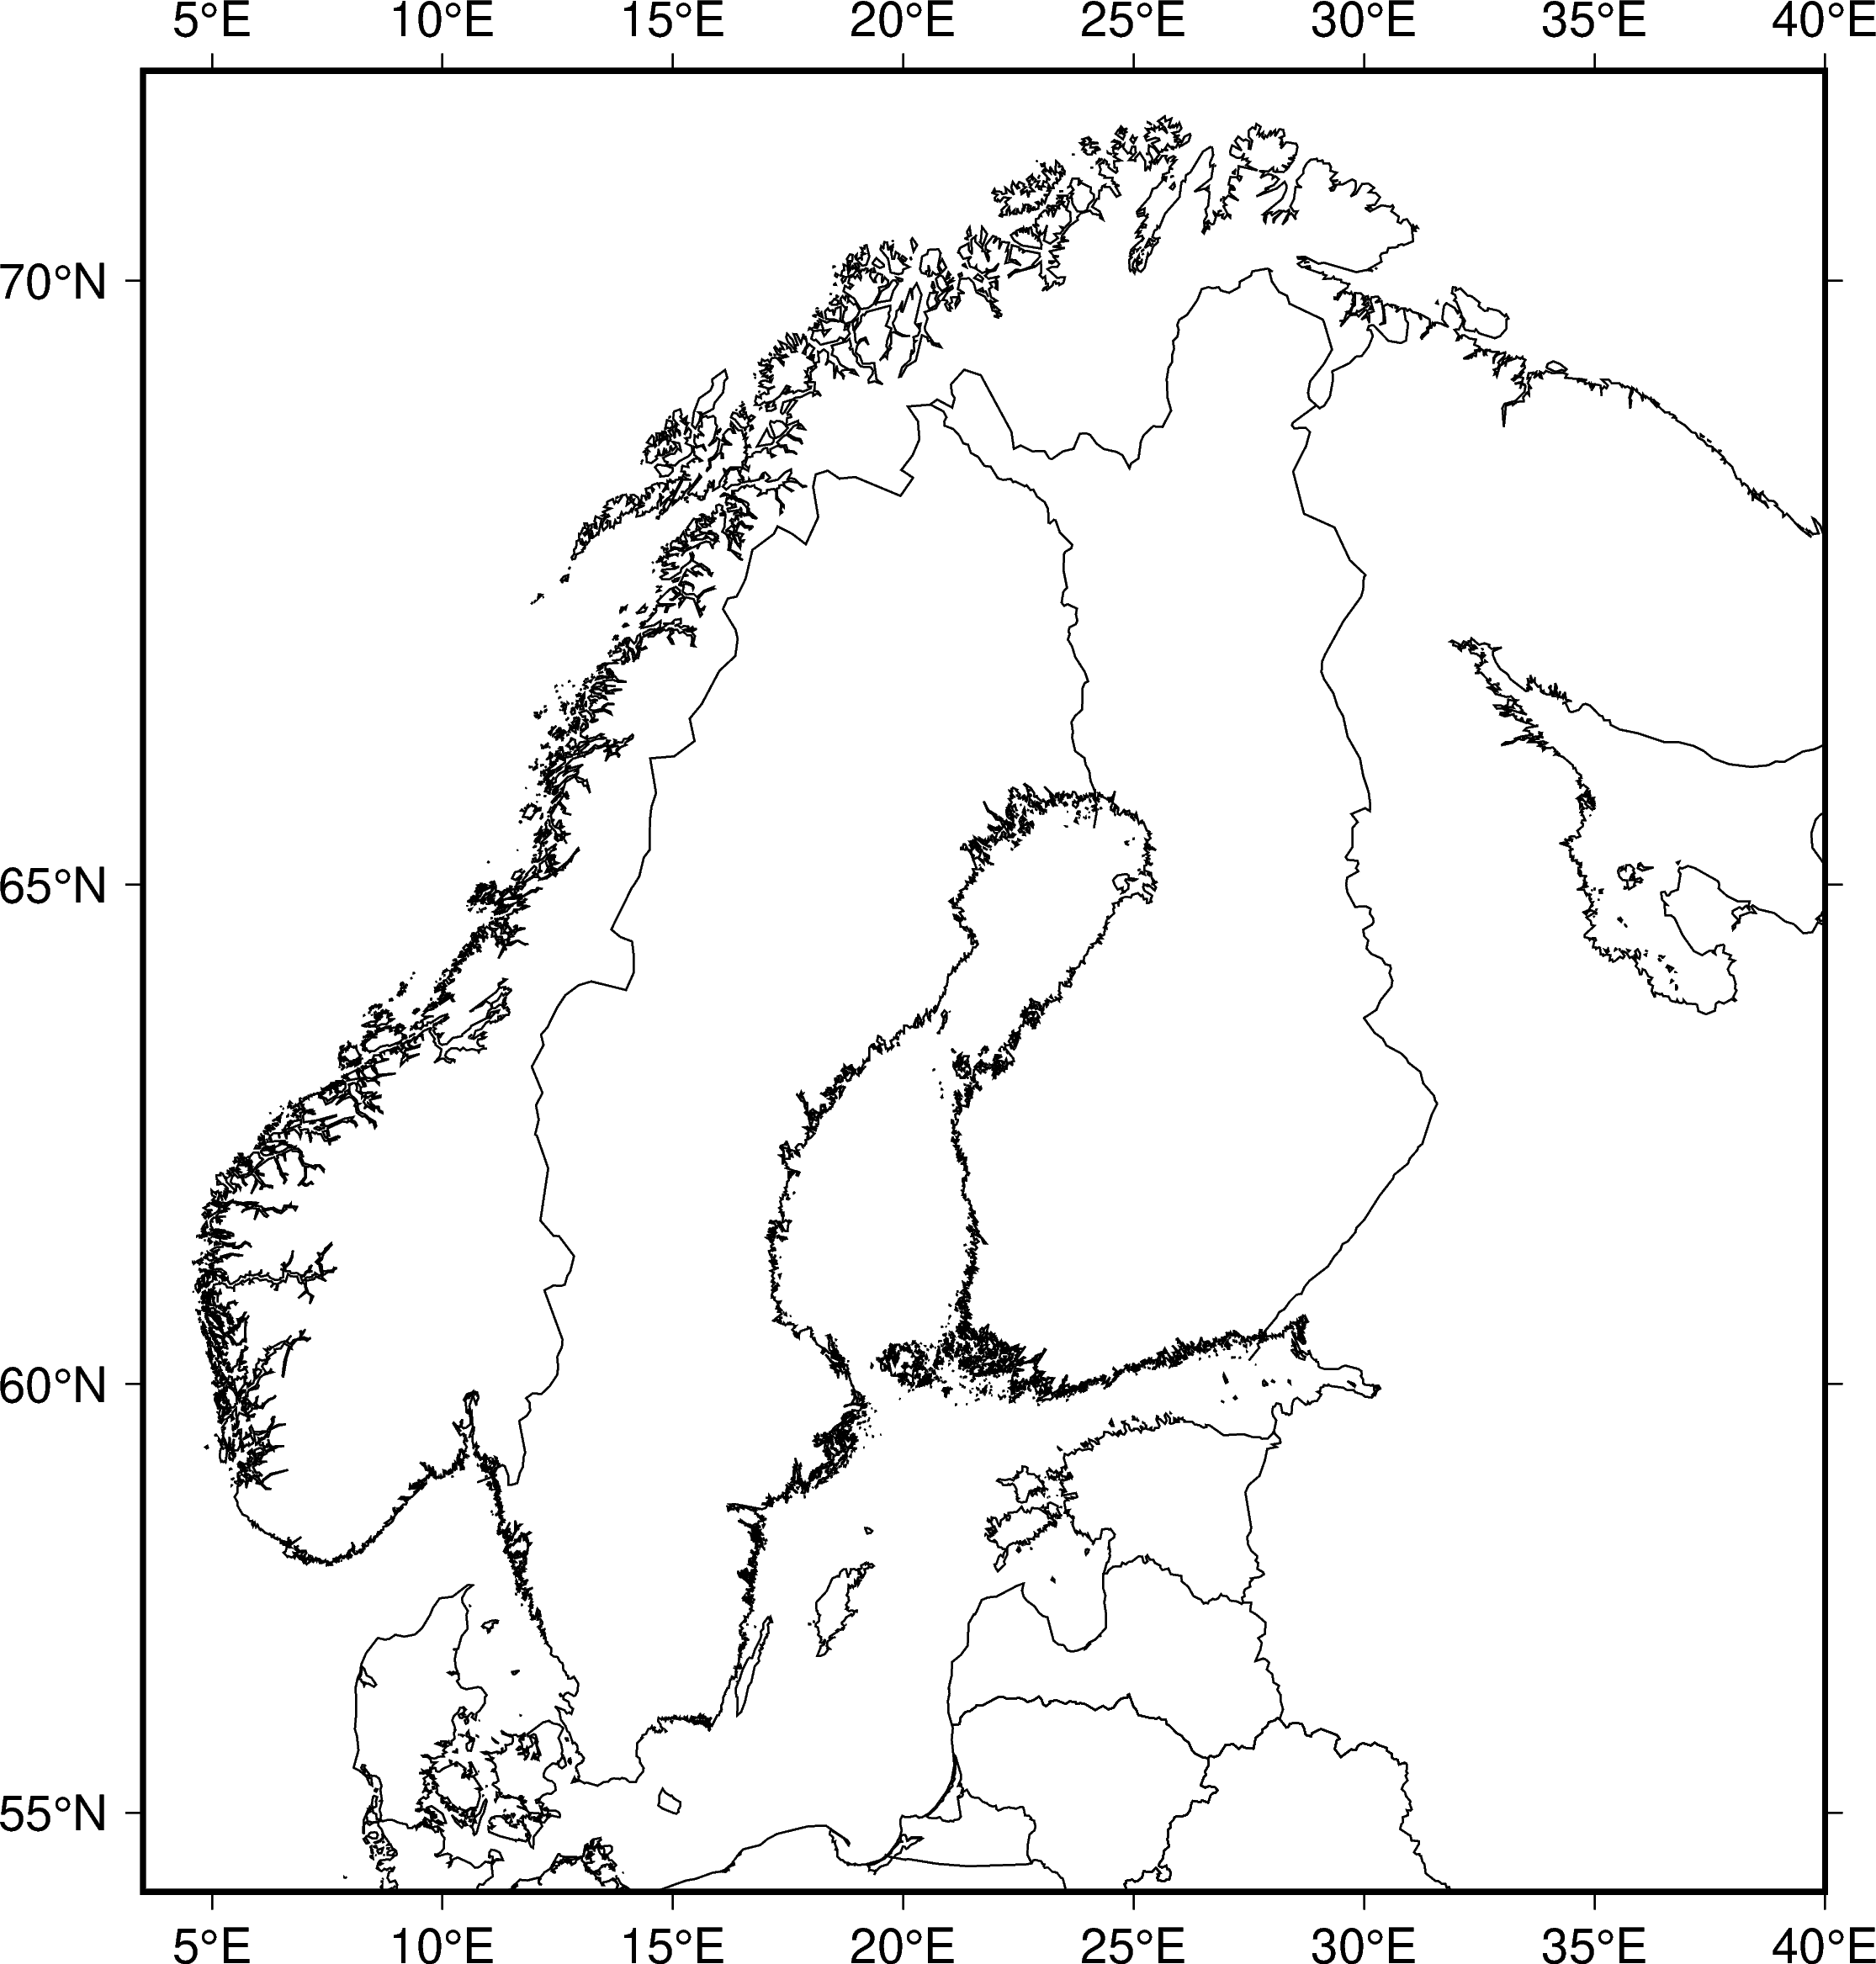

In [3]:
# define region
regvals = [3.5, 40, 54, 71.5]

# plot coastlines etc.
fig.coast(region = regvals, projection = 'm1:24000000', 
          resolution = 'i', shorelines ='1/0.5p,black', 
          frame = ['NSeW','x5','y5'], borders = ['1/0.5p,black'])

fig.show()

* load the file (`filein = 'scan_tectonic.dat'`) containing the digitzed tectonic units using pandas
* define colors for the individual units
* merge content into a dictionary for easier access later

In [4]:
# read file using pandas
filein = 'scan_tectonic.dat'
namescol = ['lon', 'lat', 'name', 'num']
datatab = pd.read_table(filein, sep="\s+", skiprows = 5, names = namescol)

# colors of different tectonic units
col_sveco = '248/188/203'
col_rapa = 'darkgray'
col_paleo = '107/107/148'
col_phanero = '115/195/128'
col_sveconor = '238/106/80'
col_arch = '241/99/106'
col_cale = '249/190/75'
col_TIB = '149/116/83'

# generate dict to store all data
provs = {'Phanerozoic2': col_phanero, 'Svecofennian': col_sveco, 'Rapaviki': col_rapa,
         'Paleoproterozoic': col_paleo, 'Phanerozoic': col_phanero, 'Sveconorwegian': col_sveconor,
         'Archean': col_arch, 'Caledonides': col_cale, 'TIB': col_TIB}

Plot the individual tectonic units with their corresponding colors and define labels for the legend (`label = key`) that is created later. Prior do some filtering based on the names and values given in the input file. 

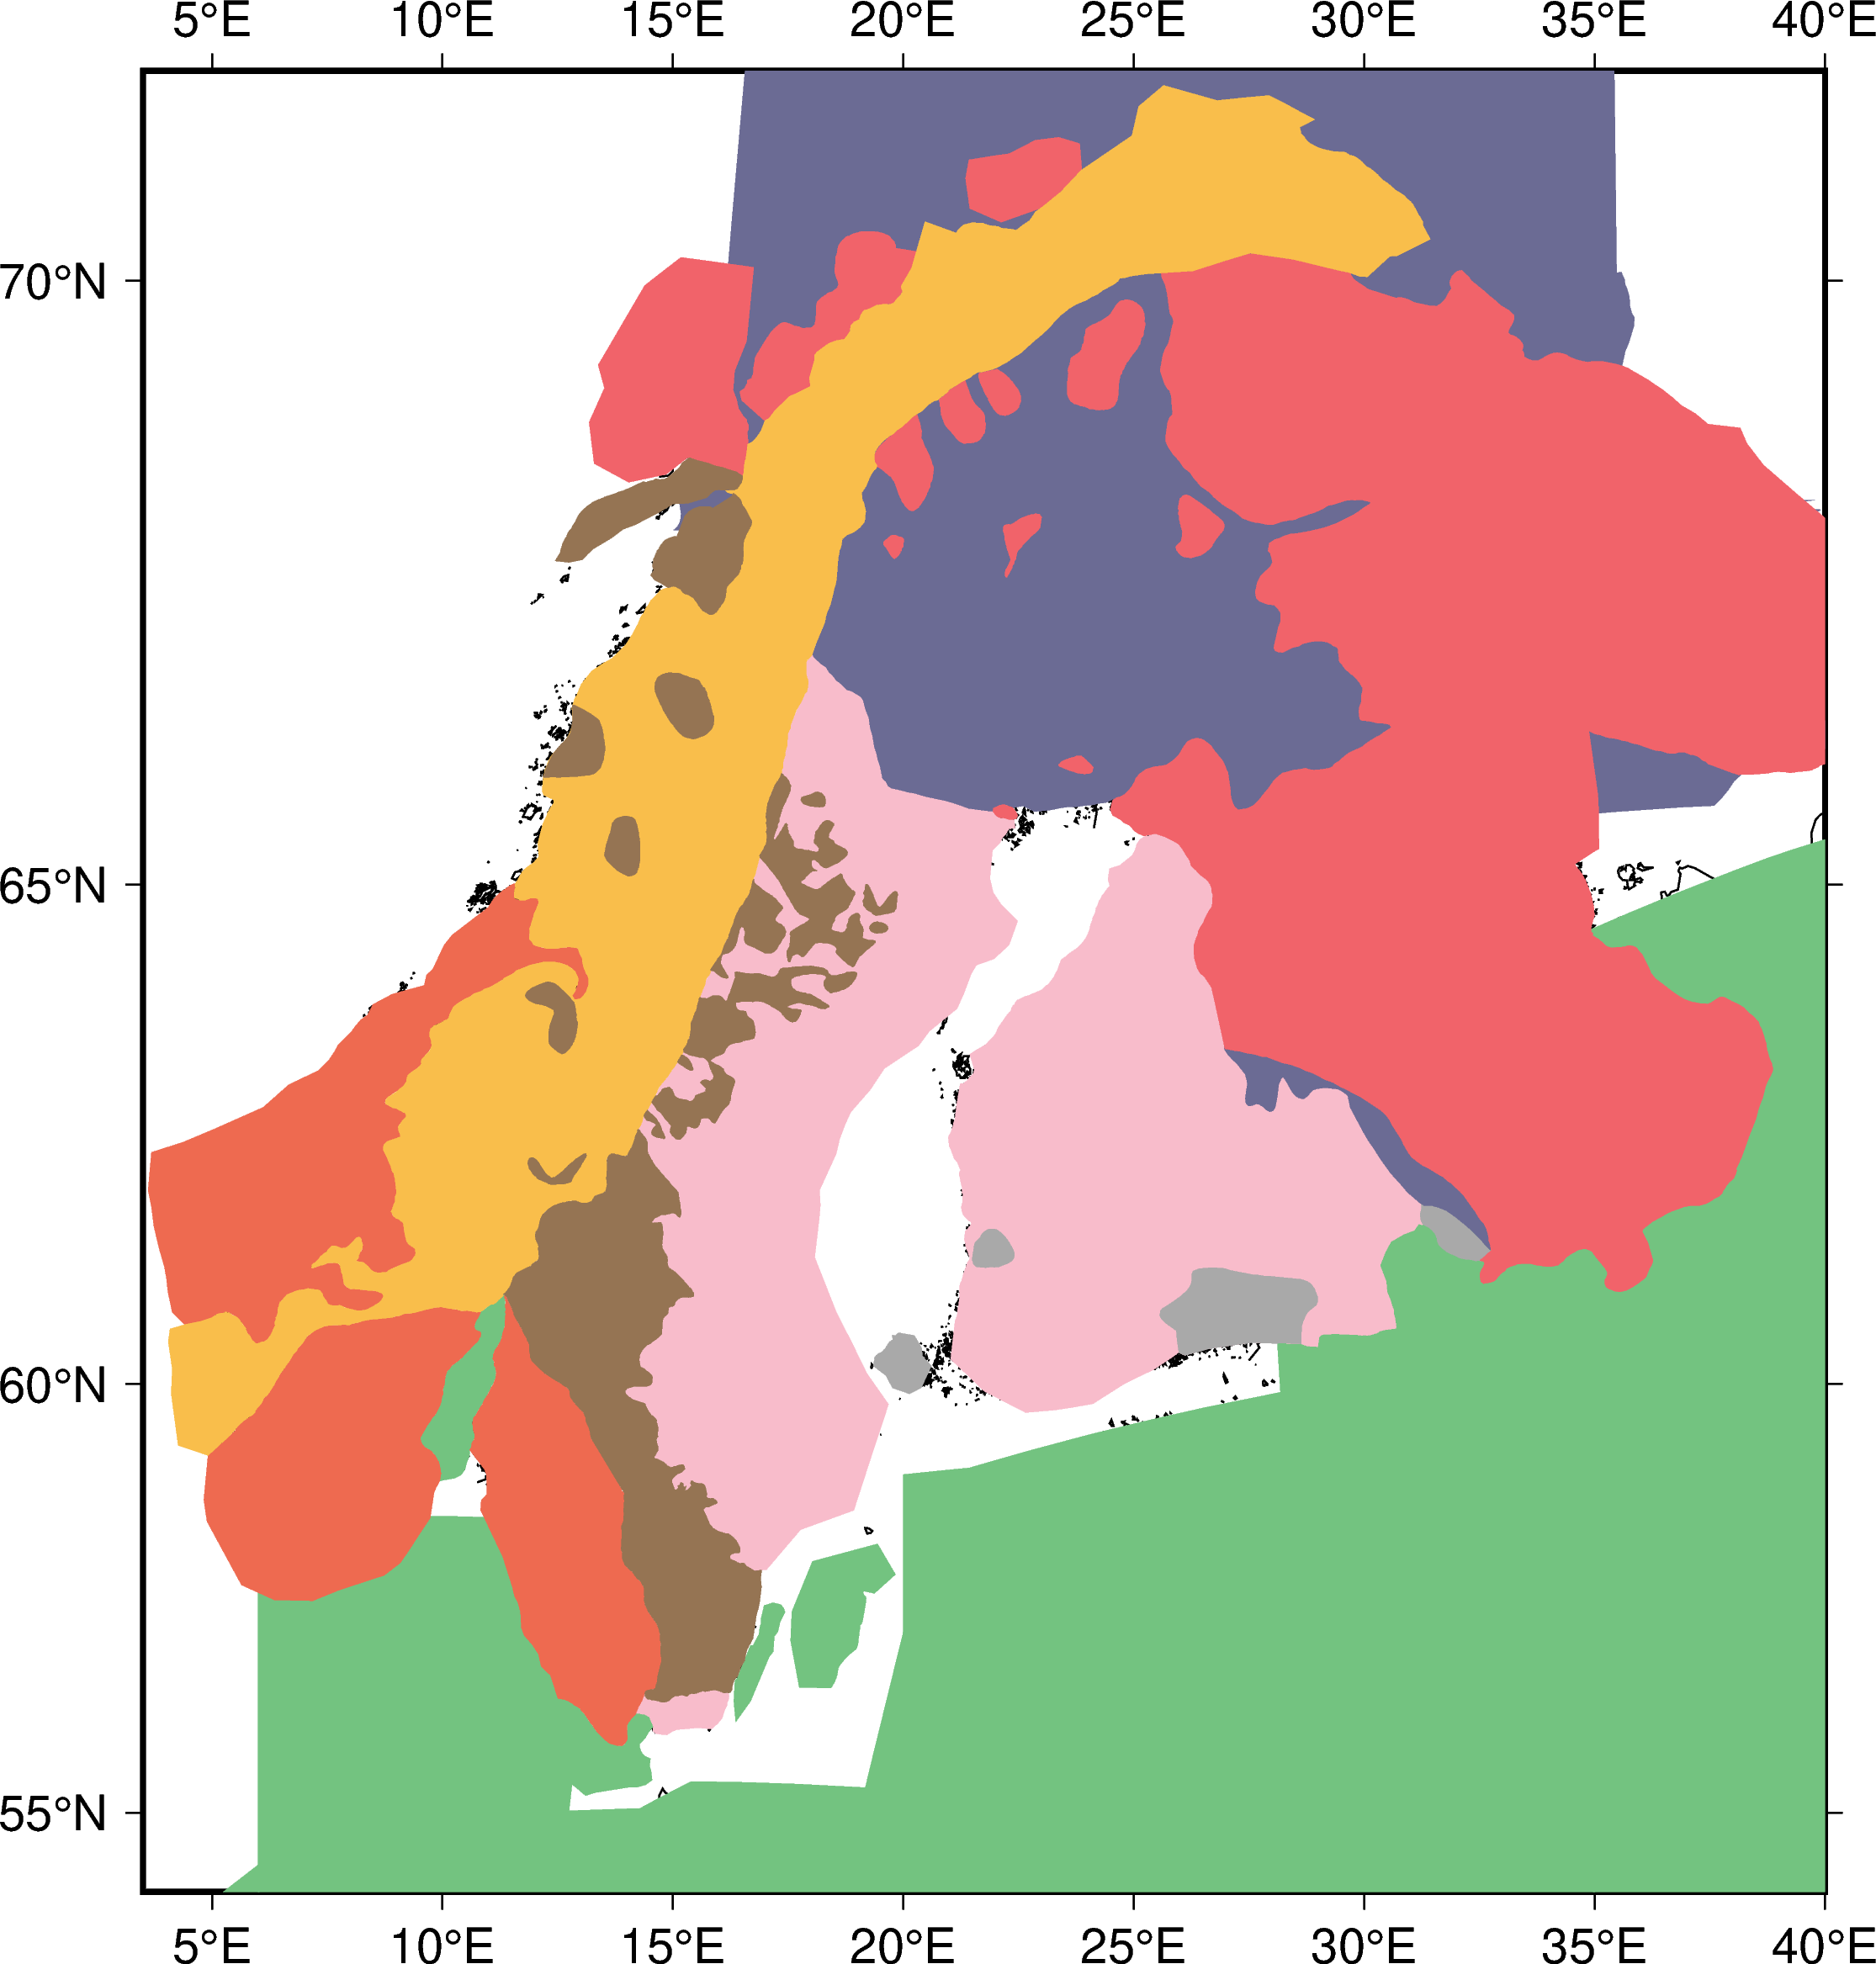

In [5]:
for key in provs:
    tabfilt11 = datatab[(datatab['name'] == key)].copy() # for each data point get name of corresponding tectonic unit
    vals = np.unique(tabfilt11['num']) # remove doublets
    
    for val in vals: # go through the different unit names and plot the areas in the defined colors
        tabfilt12 = tabfilt11[(tabfilt11['num'] == val)].copy()

        tabfilt12['lon'] = tabfilt12['lon'].astype(float) # convert to float

        lons = tabfilt12['lon']
        lats = tabfilt12['lat']
        
        # consider each area only once in the legend below (label is set or not)
        if val == 1:
            fig.plot(x = lons, y = lats, fill = provs[key], label = key)
        else:
            fig.plot(x = lons, y = lats, fill = provs[key])

fig.show()

Overlay whole area with white transparent rectangle to soften the bright colors. 

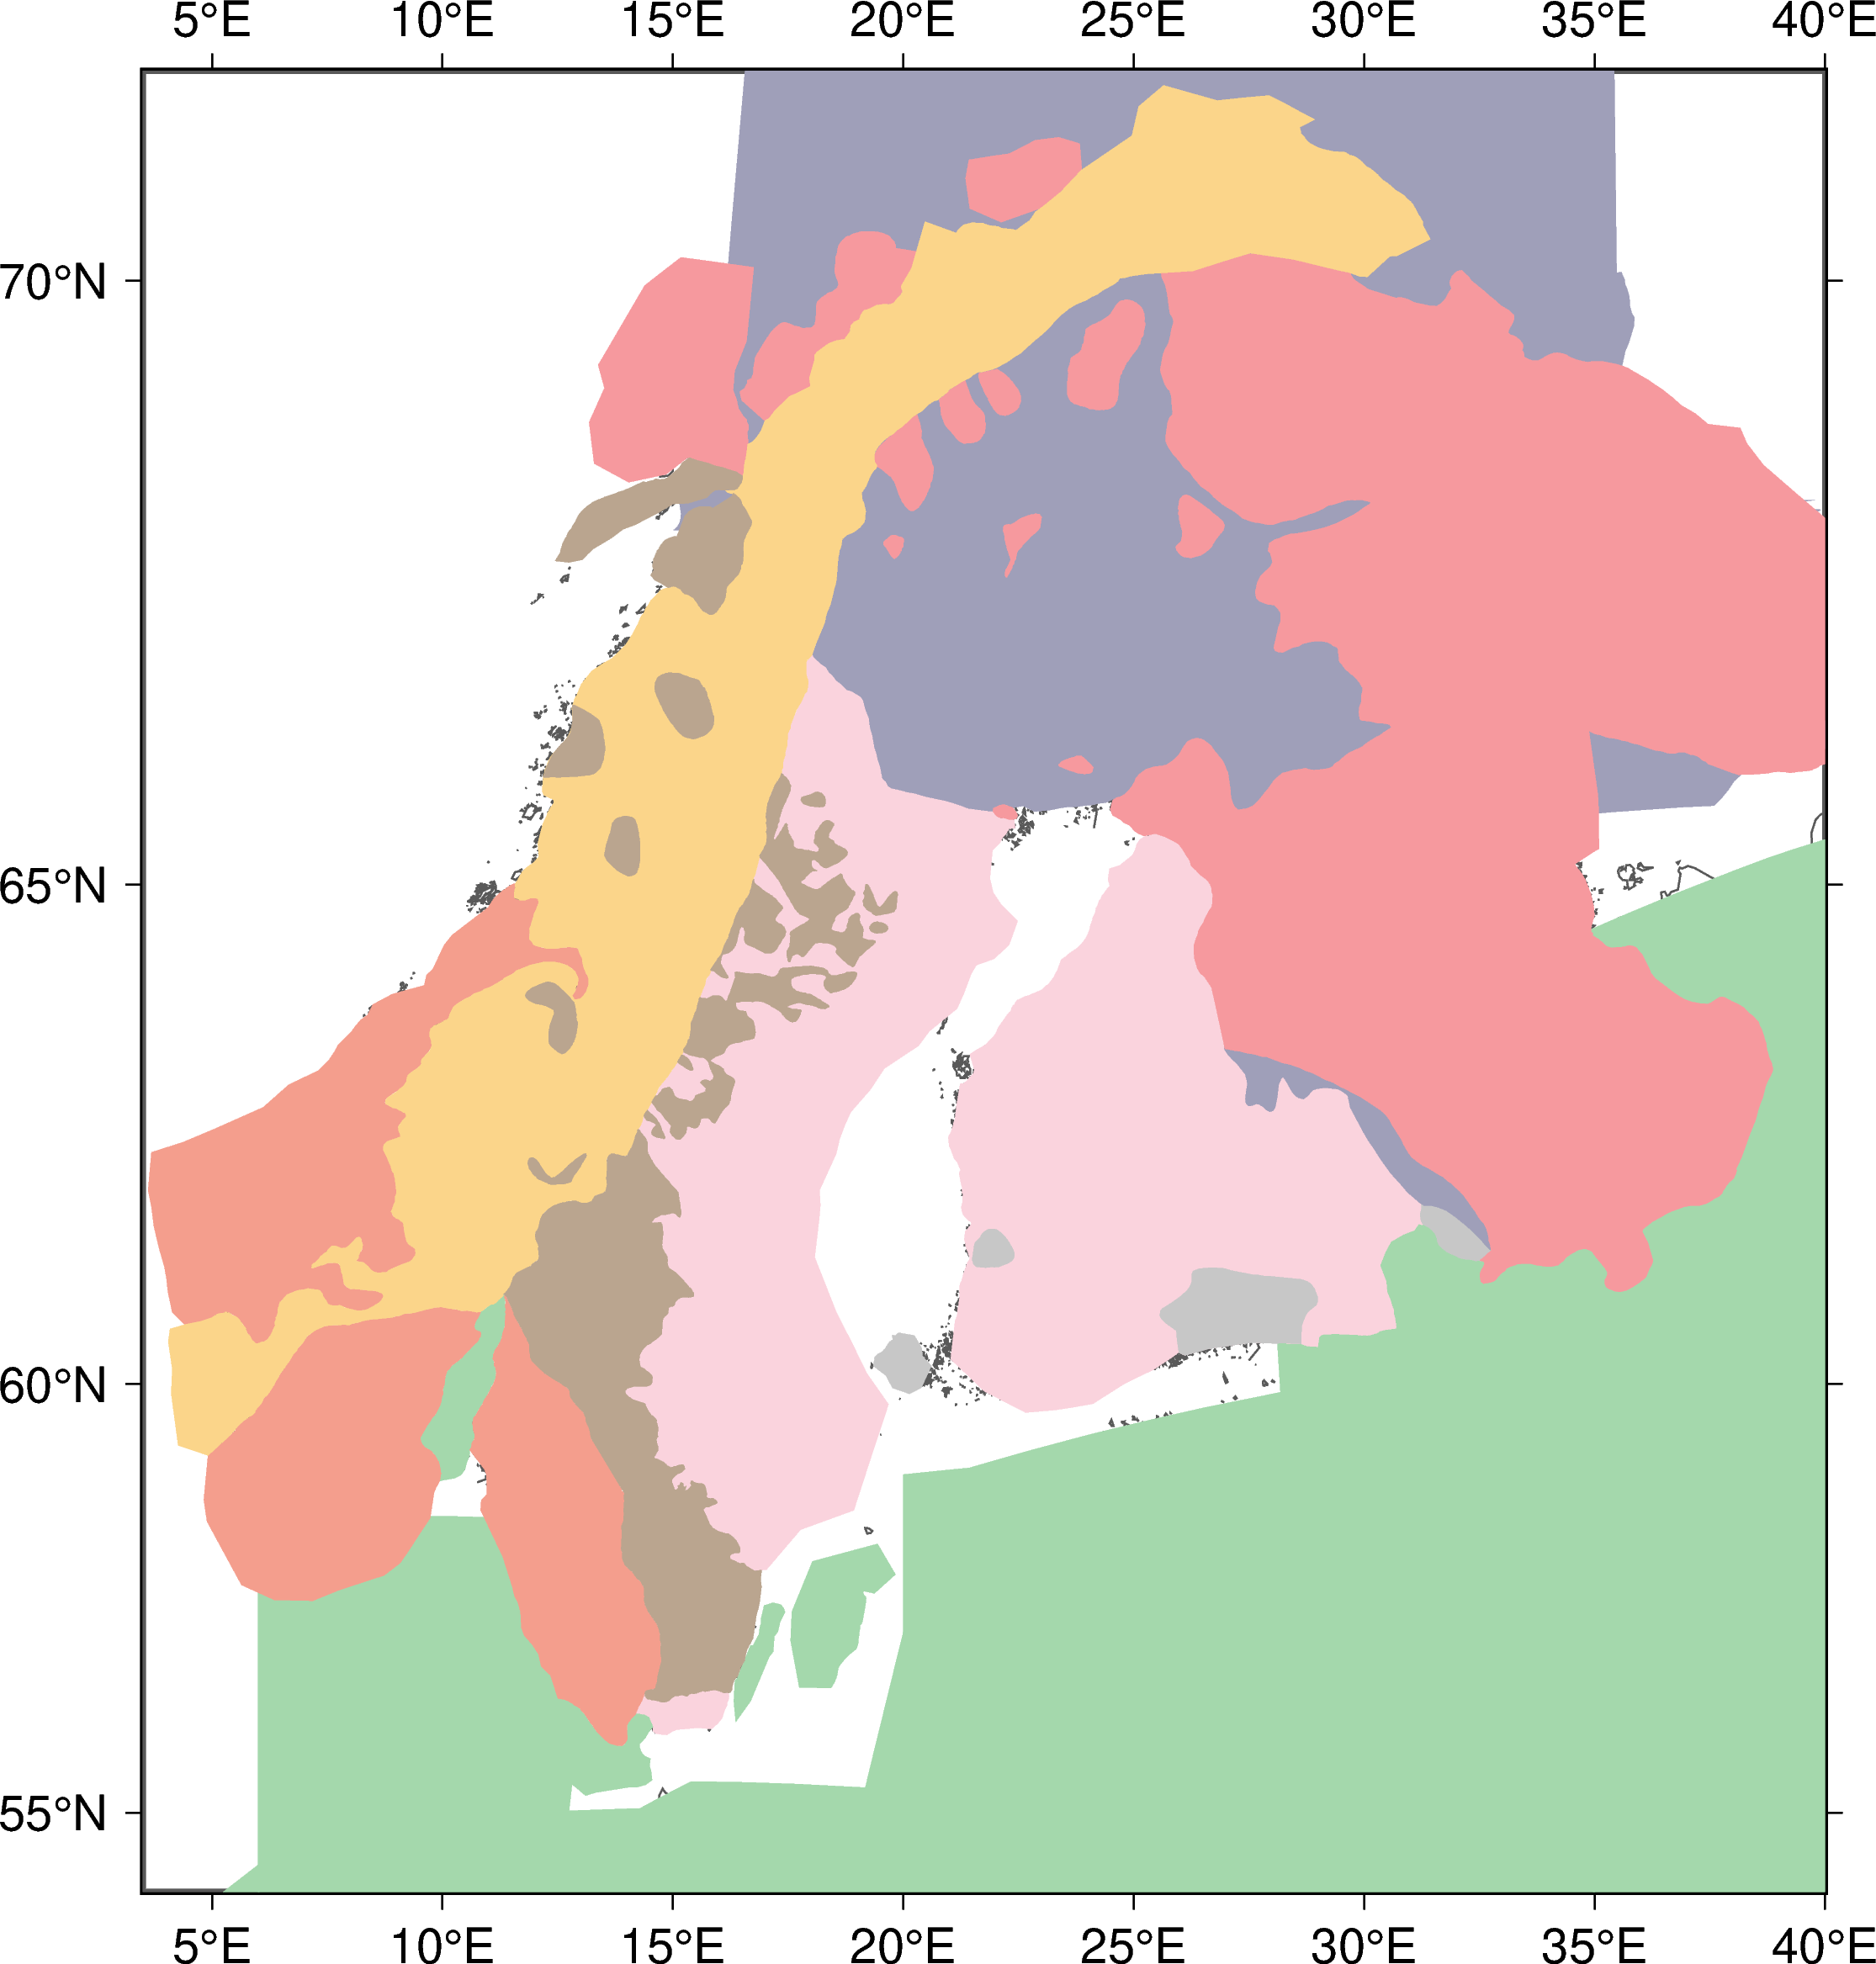

In [6]:
fig.plot(x = [-5, -5, 55, 55, -5], 
         y = [45, 80, 80, 45, 45], 
         fill = 'white@65')

fig.show()

Add coastlines etc. on top to display only land masses in color of tectonic units and plot water areas in white (`water = 'white'`). Political borders are shown as black dashed lines (`borders = ['1/0.5p,black,--']`). Finally, add a scalebar in upper left corner (`map_scale = 'f7.8/67/56/400+lkm+jt'`).

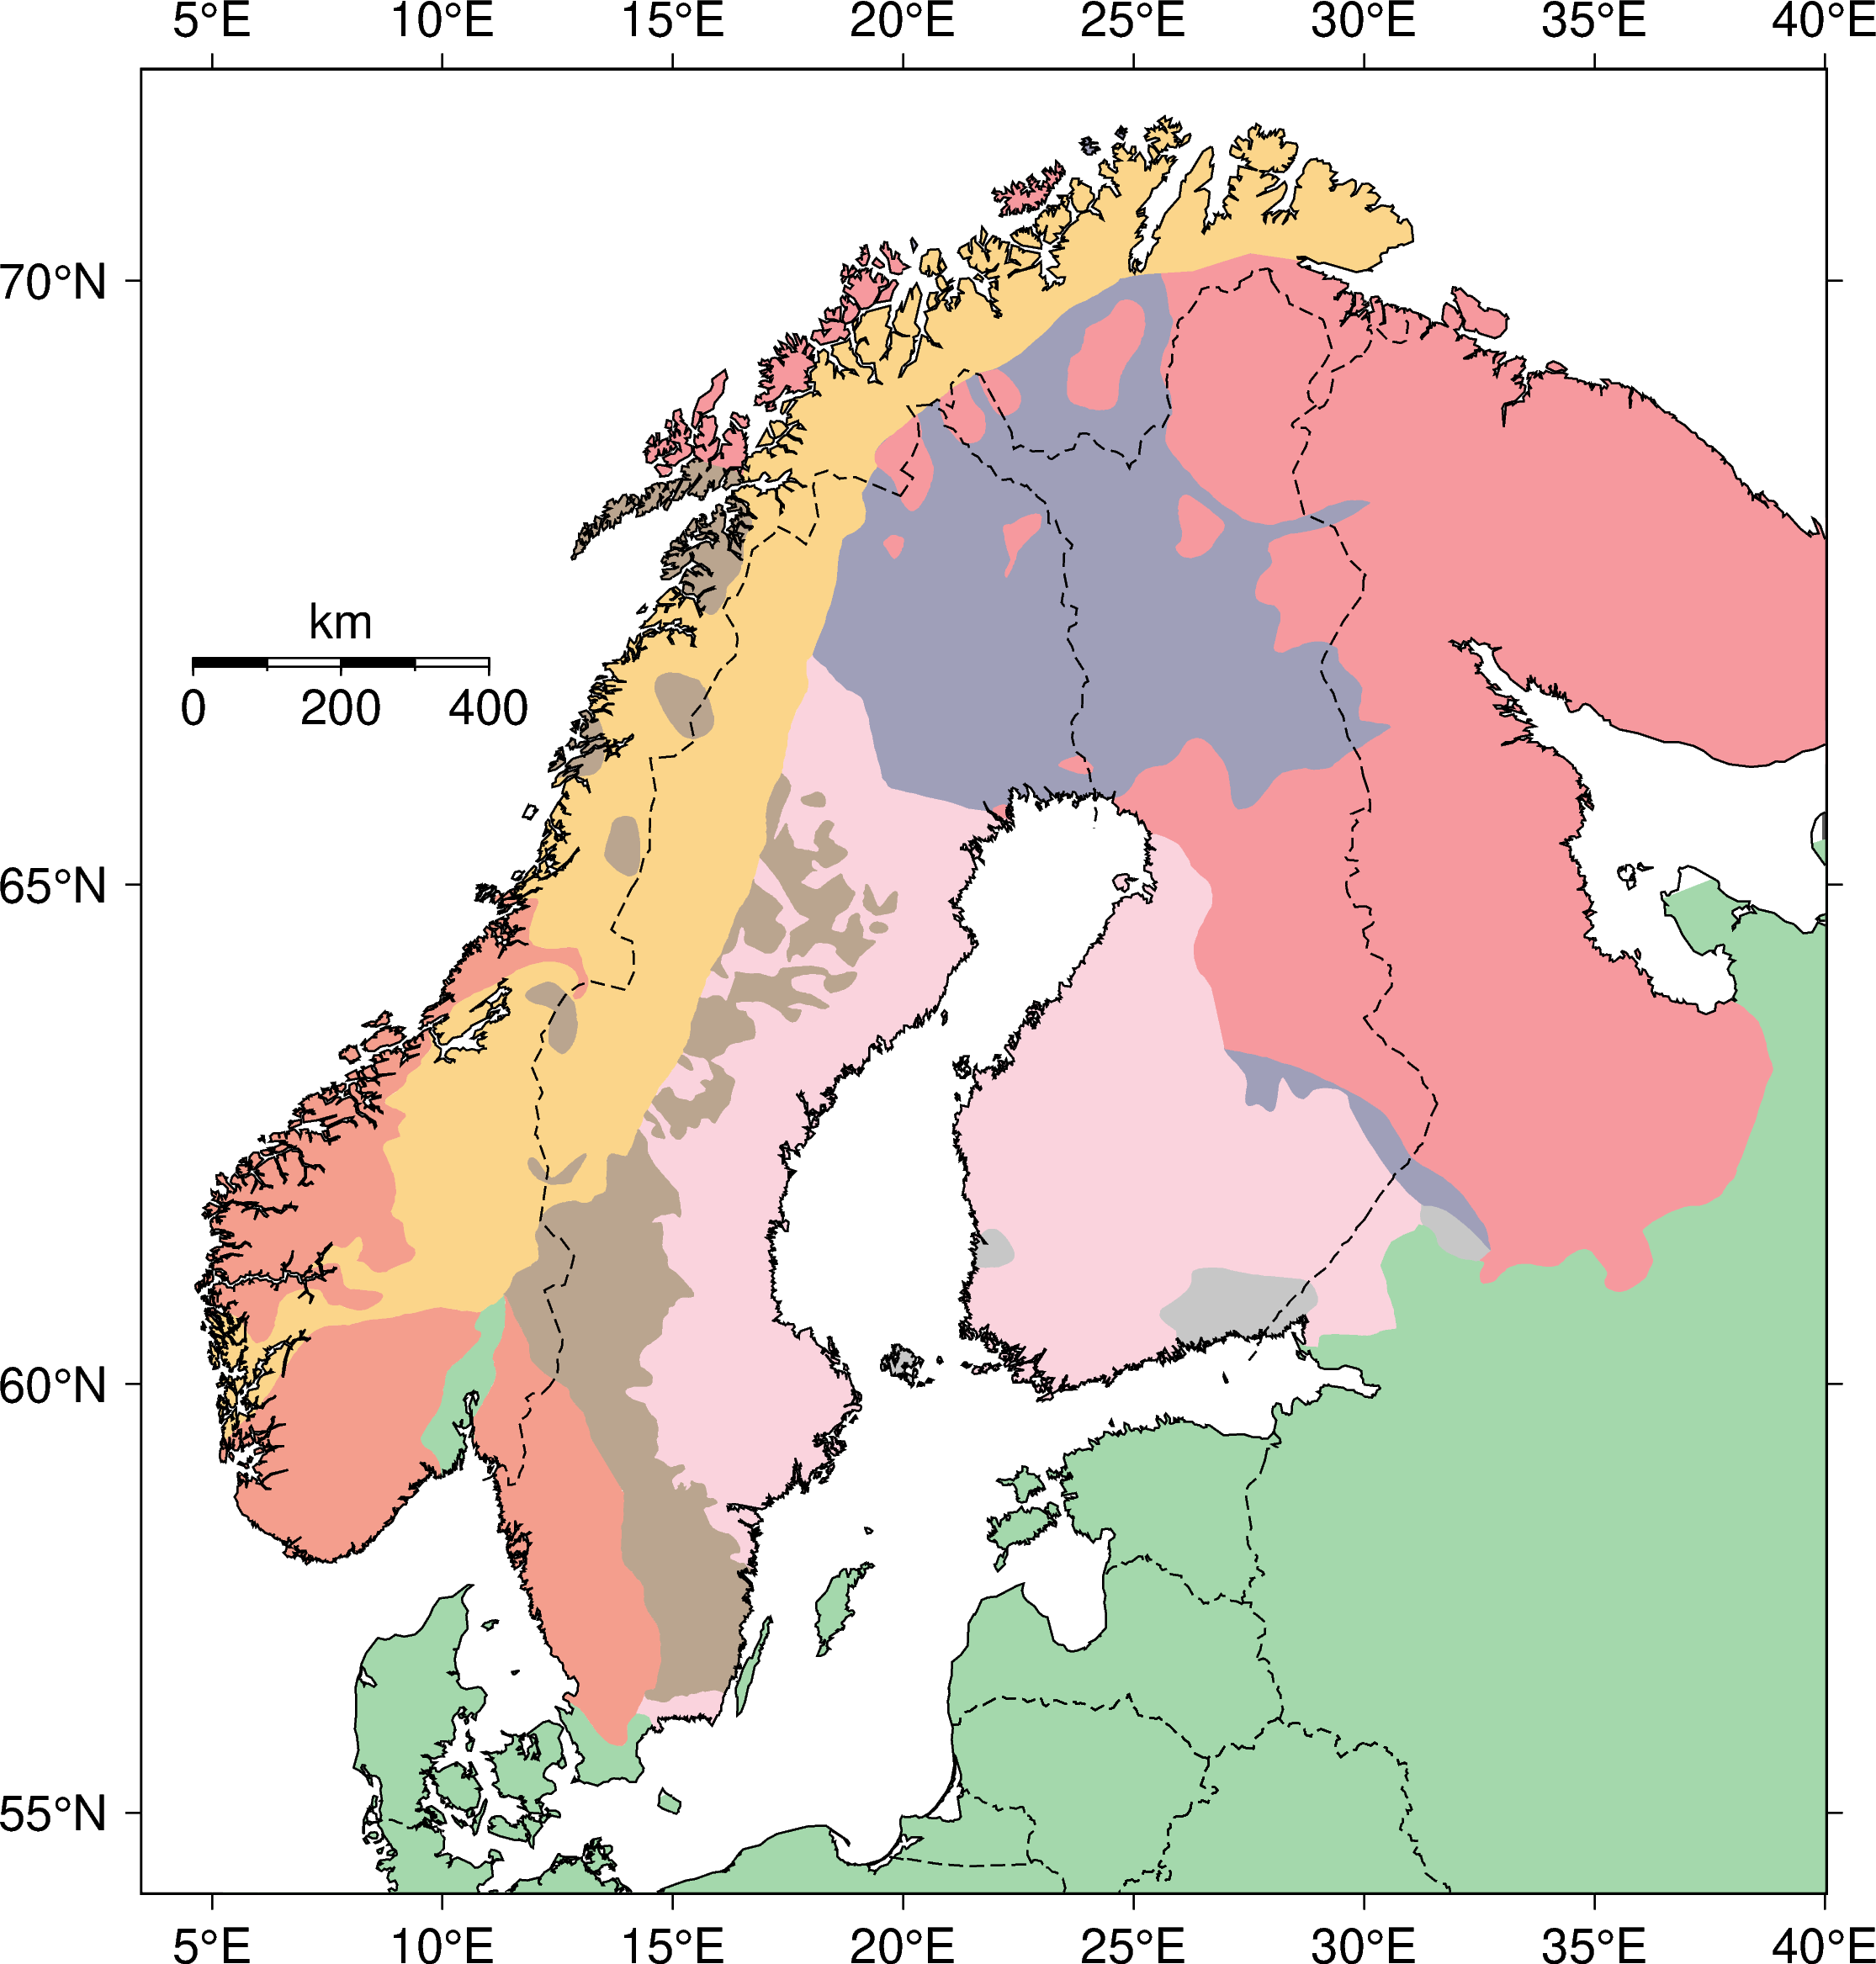

In [7]:
# add coast again on top, add national borders as dashed lines, plot lakes in steelblue color, oceans are plotted in white 
# atop which generates the masked view
fig.coast(resolution = 'i', 
          shorelines ='1/0.5p,black', 
          area_thresh = '20/0/1',
          borders = ['1/0.5p,black,--'], 
          water = 'white', 
          map_scale = 'f7.8/67/56/400+lkm+jt')

fig.show()

Now we add further tectonic features like 
* shear zones
* inferred paleo-subduction zones 
* the digitized Tornquist zone

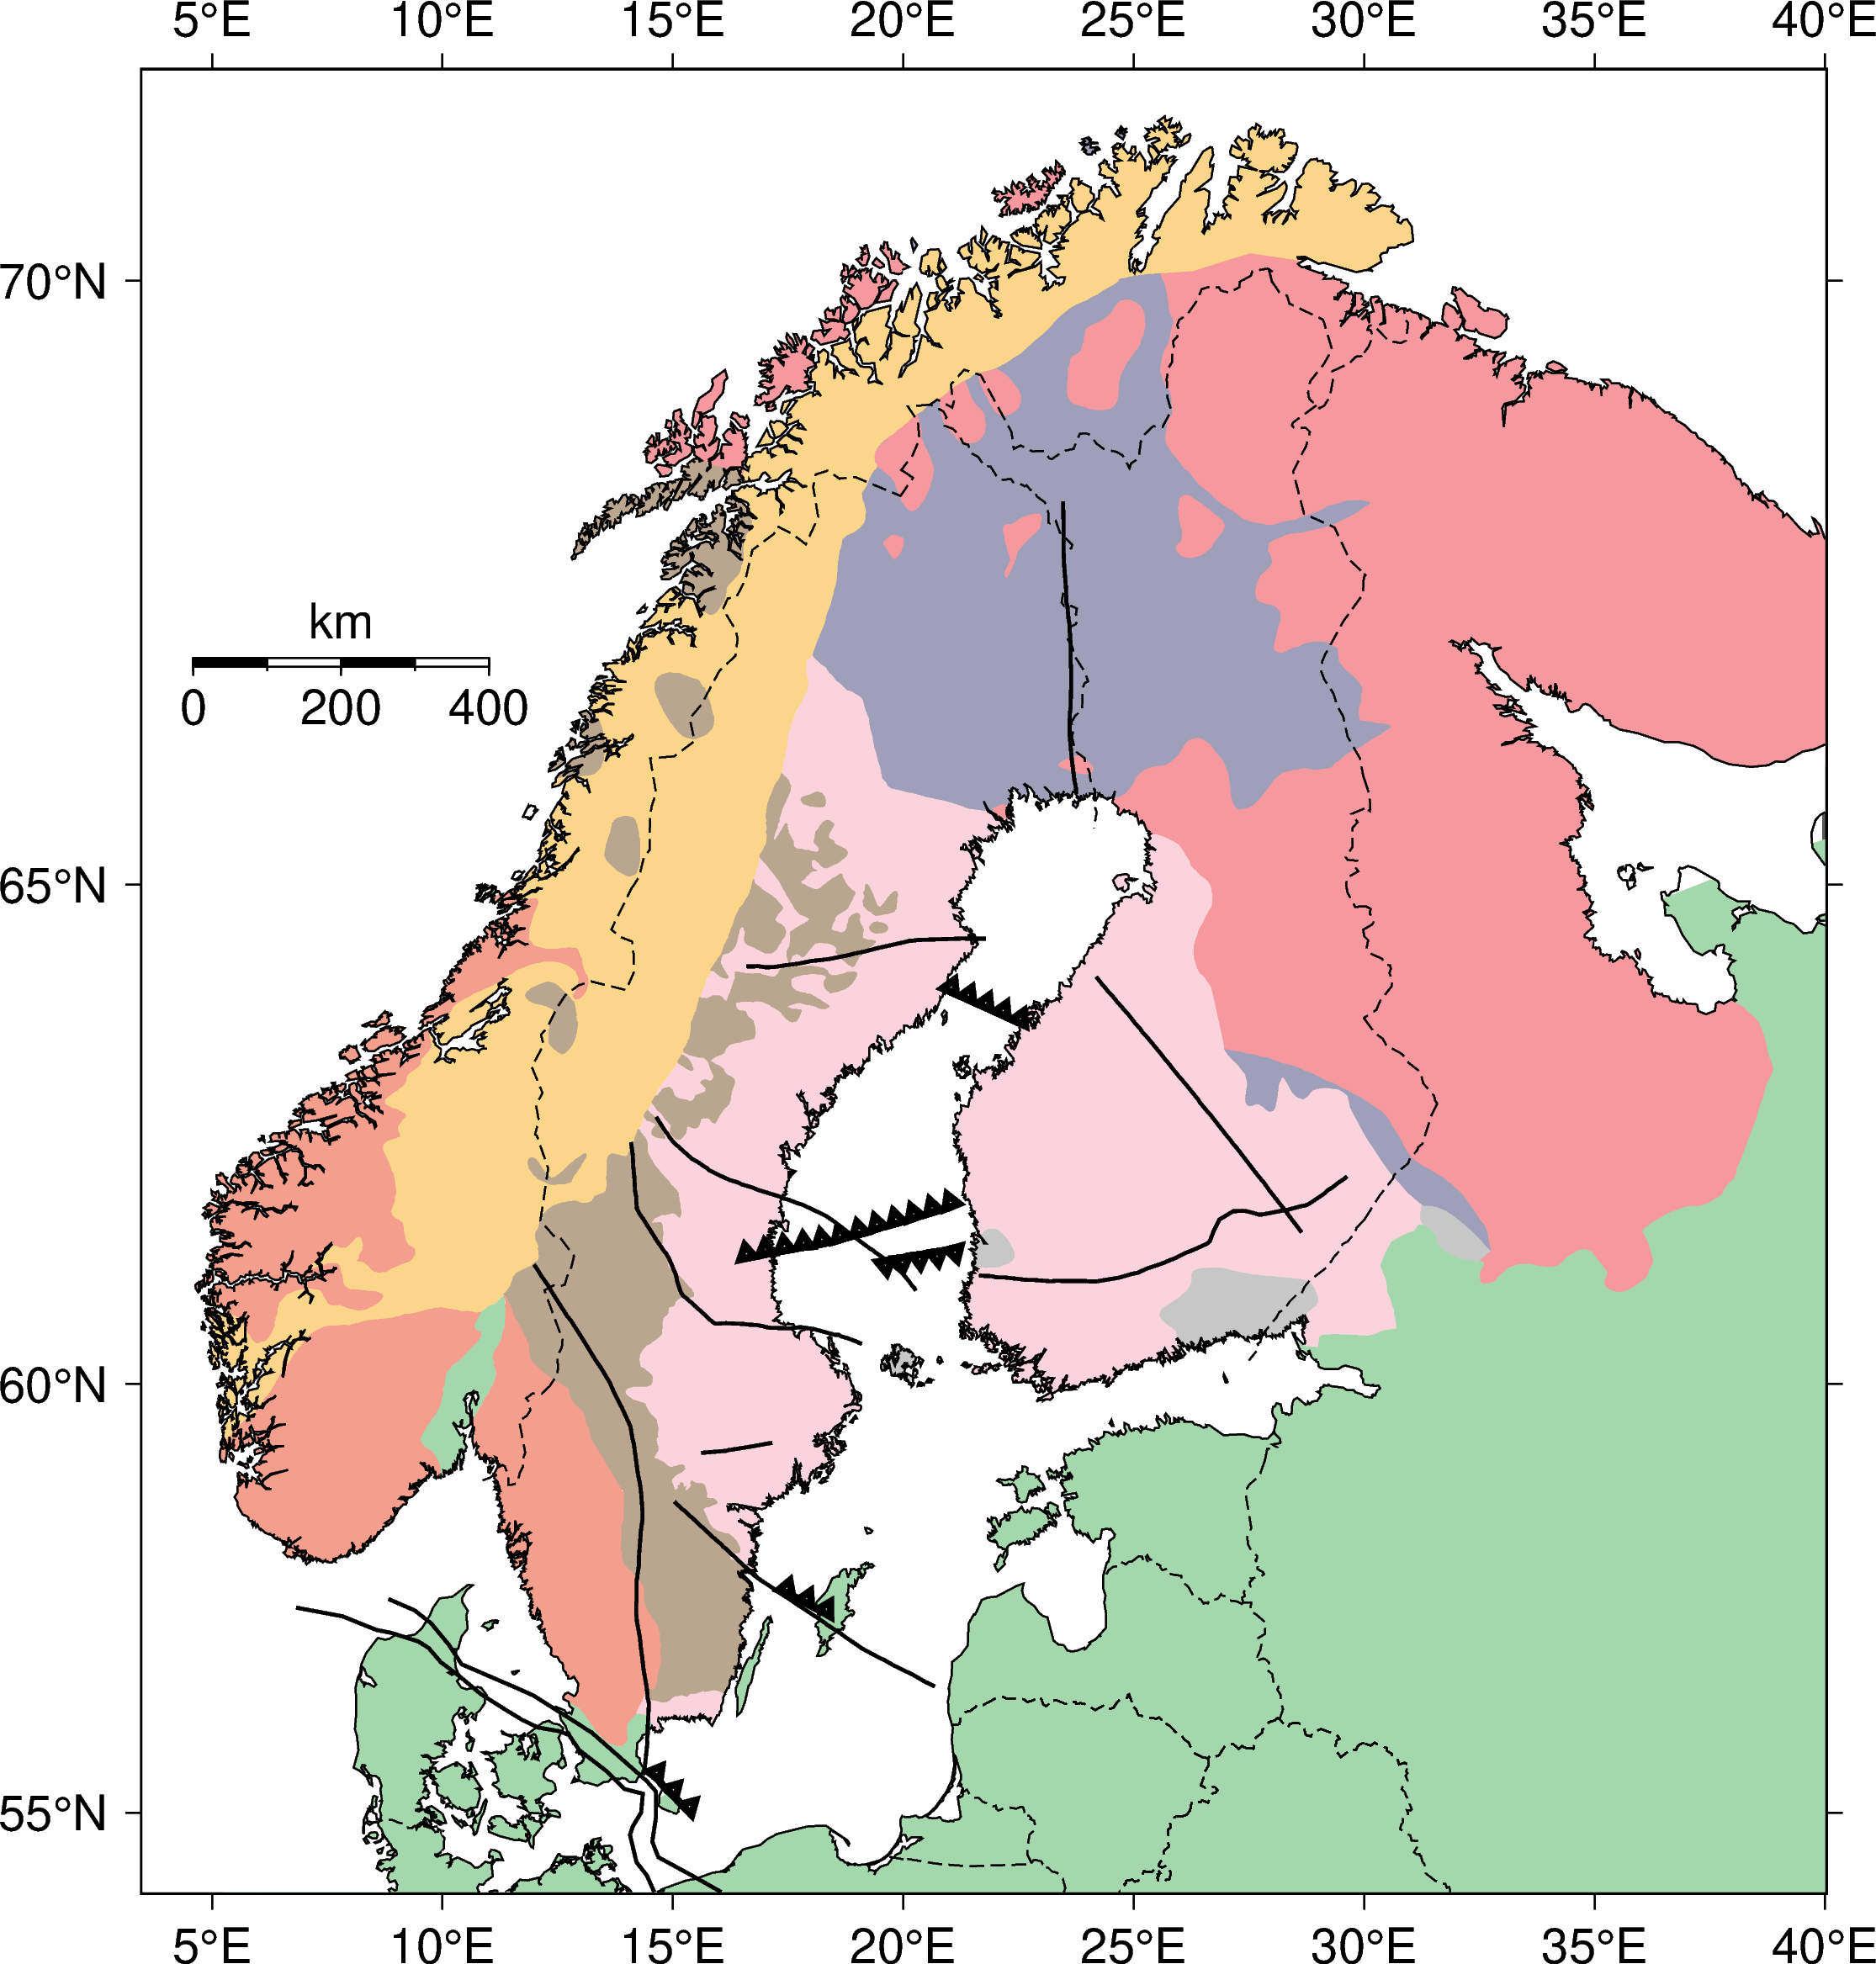

In [8]:
# read in file using pandas
filein2 = 'scan_shear_zones.dat'
namescol2 = ['lon', 'lat', 'name']
datatab2 = pd.read_table(filein2, sep="\s+", skiprows = 5, names = namescol2)

# get single names of individual structures to plot
names = list(set(datatab2['name']))
namescl = [x for x in names if str(x) != 'nan']

for name in namescl: # go through the different names 
    tabfilt21 = datatab2[(datatab2['name'] == name)].copy()
    
    tabfilt21['lon'] = tabfilt21['lon'].astype(float) # convert to float
    lons = tabfilt21['lon']
    lats = tabfilt21['lat']
    
    # first distinguish between shear zones and subduction zones
    if name.startswith('Shear'):
        fig.plot(x = lons, y = lats, pen = '1p,black')
    else:
        
        # now distinguish in which direction ((l)eft or (r)ight) sawtooth pattern should be plotted
        if name.endswith('r'):    
            fig.plot(x = lons, y = lats, style = 'f0.2/0.15+t+r', pen = '2p,black')
        else:
            fig.plot(x = lons, y = lats, style = 'f0.2/0.15+t+l', pen = '2p,black')
                    
# Tornquist Zone, read in file using pandas, we can use the columnnames from above here 
filein3 = 'scan_STZ.dat'
datatab3 = pd.read_table(filein3, sep="\s+", skiprows = 3, names = namescol2)

# get single names of individual structures to plot
names2 = list(set(datatab3['name']))
namescl2 = [x for x in names2 if str(x) != 'nan']  
   
# plot the Tornquist zone 
for name in namescl2:   
    tabfilt31 = datatab3[(datatab3['name'] == name)].copy()
    
    tabfilt31['lon'] = tabfilt31['lon'].astype(float) # convert to float
    lons = tabfilt31['lon']
    lats = tabfilt31['lat']
    
    fig.plot(x = lons, y = lats, pen = '1p,black')            
              
fig.show()

Next, we generate a legend for the geological units in the lower right corner.

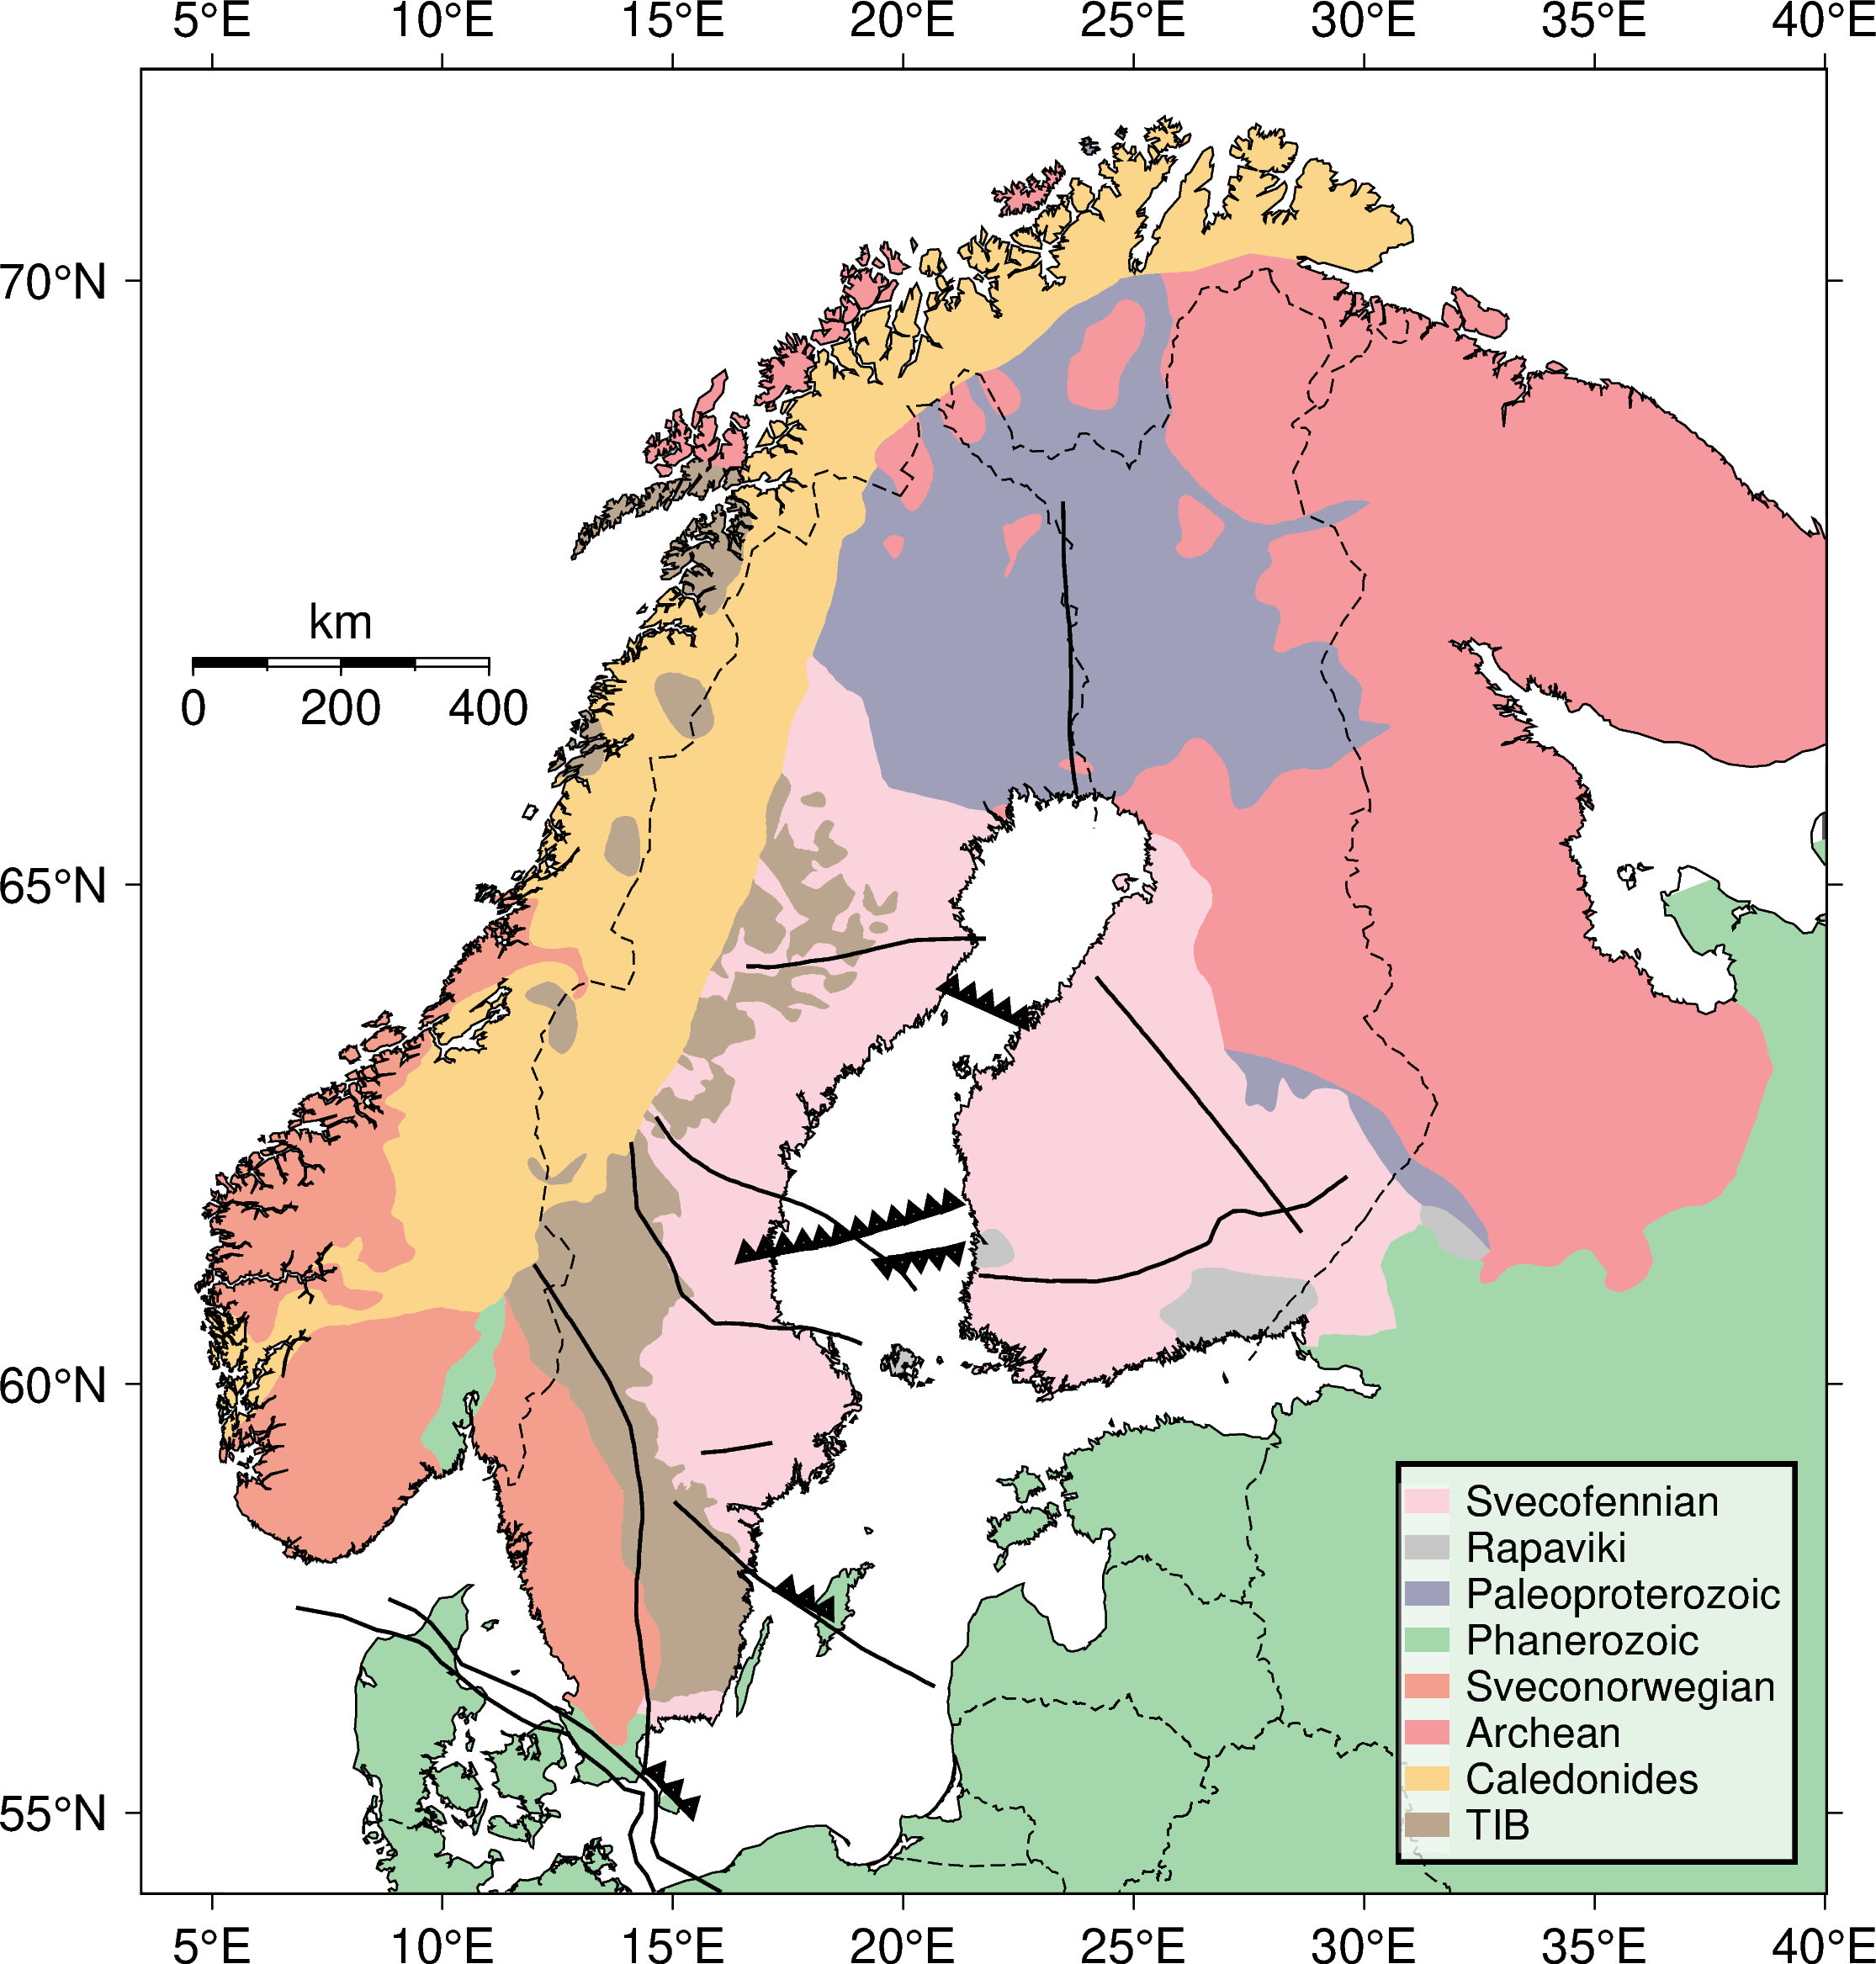

In [9]:
# generate legend 

with pygmt.config(FONT_ANNOT_PRIMARY = '12p,Helvetica'):

    fig.legend(position = 'JBR+jBR+o0.3c', 
               box = '+gwhite@30+p1.5p,black')

# add also a small rectangle atop the colors shown in the legend to fit the unit colors shown in the map
data = np.array([[30.75, 54.5],
                [30.75, 58.9],
                [31.85, 58.9],
                [31.85, 54.5],
                [30.75, 54.5]])

fig.plot(data = data,
         fill = 'white@65')

fig.show()

Finally, add annotations to map:
* country names in black
* the shear and deformation zones in blue 
* inferred paleo-subduction zones in red

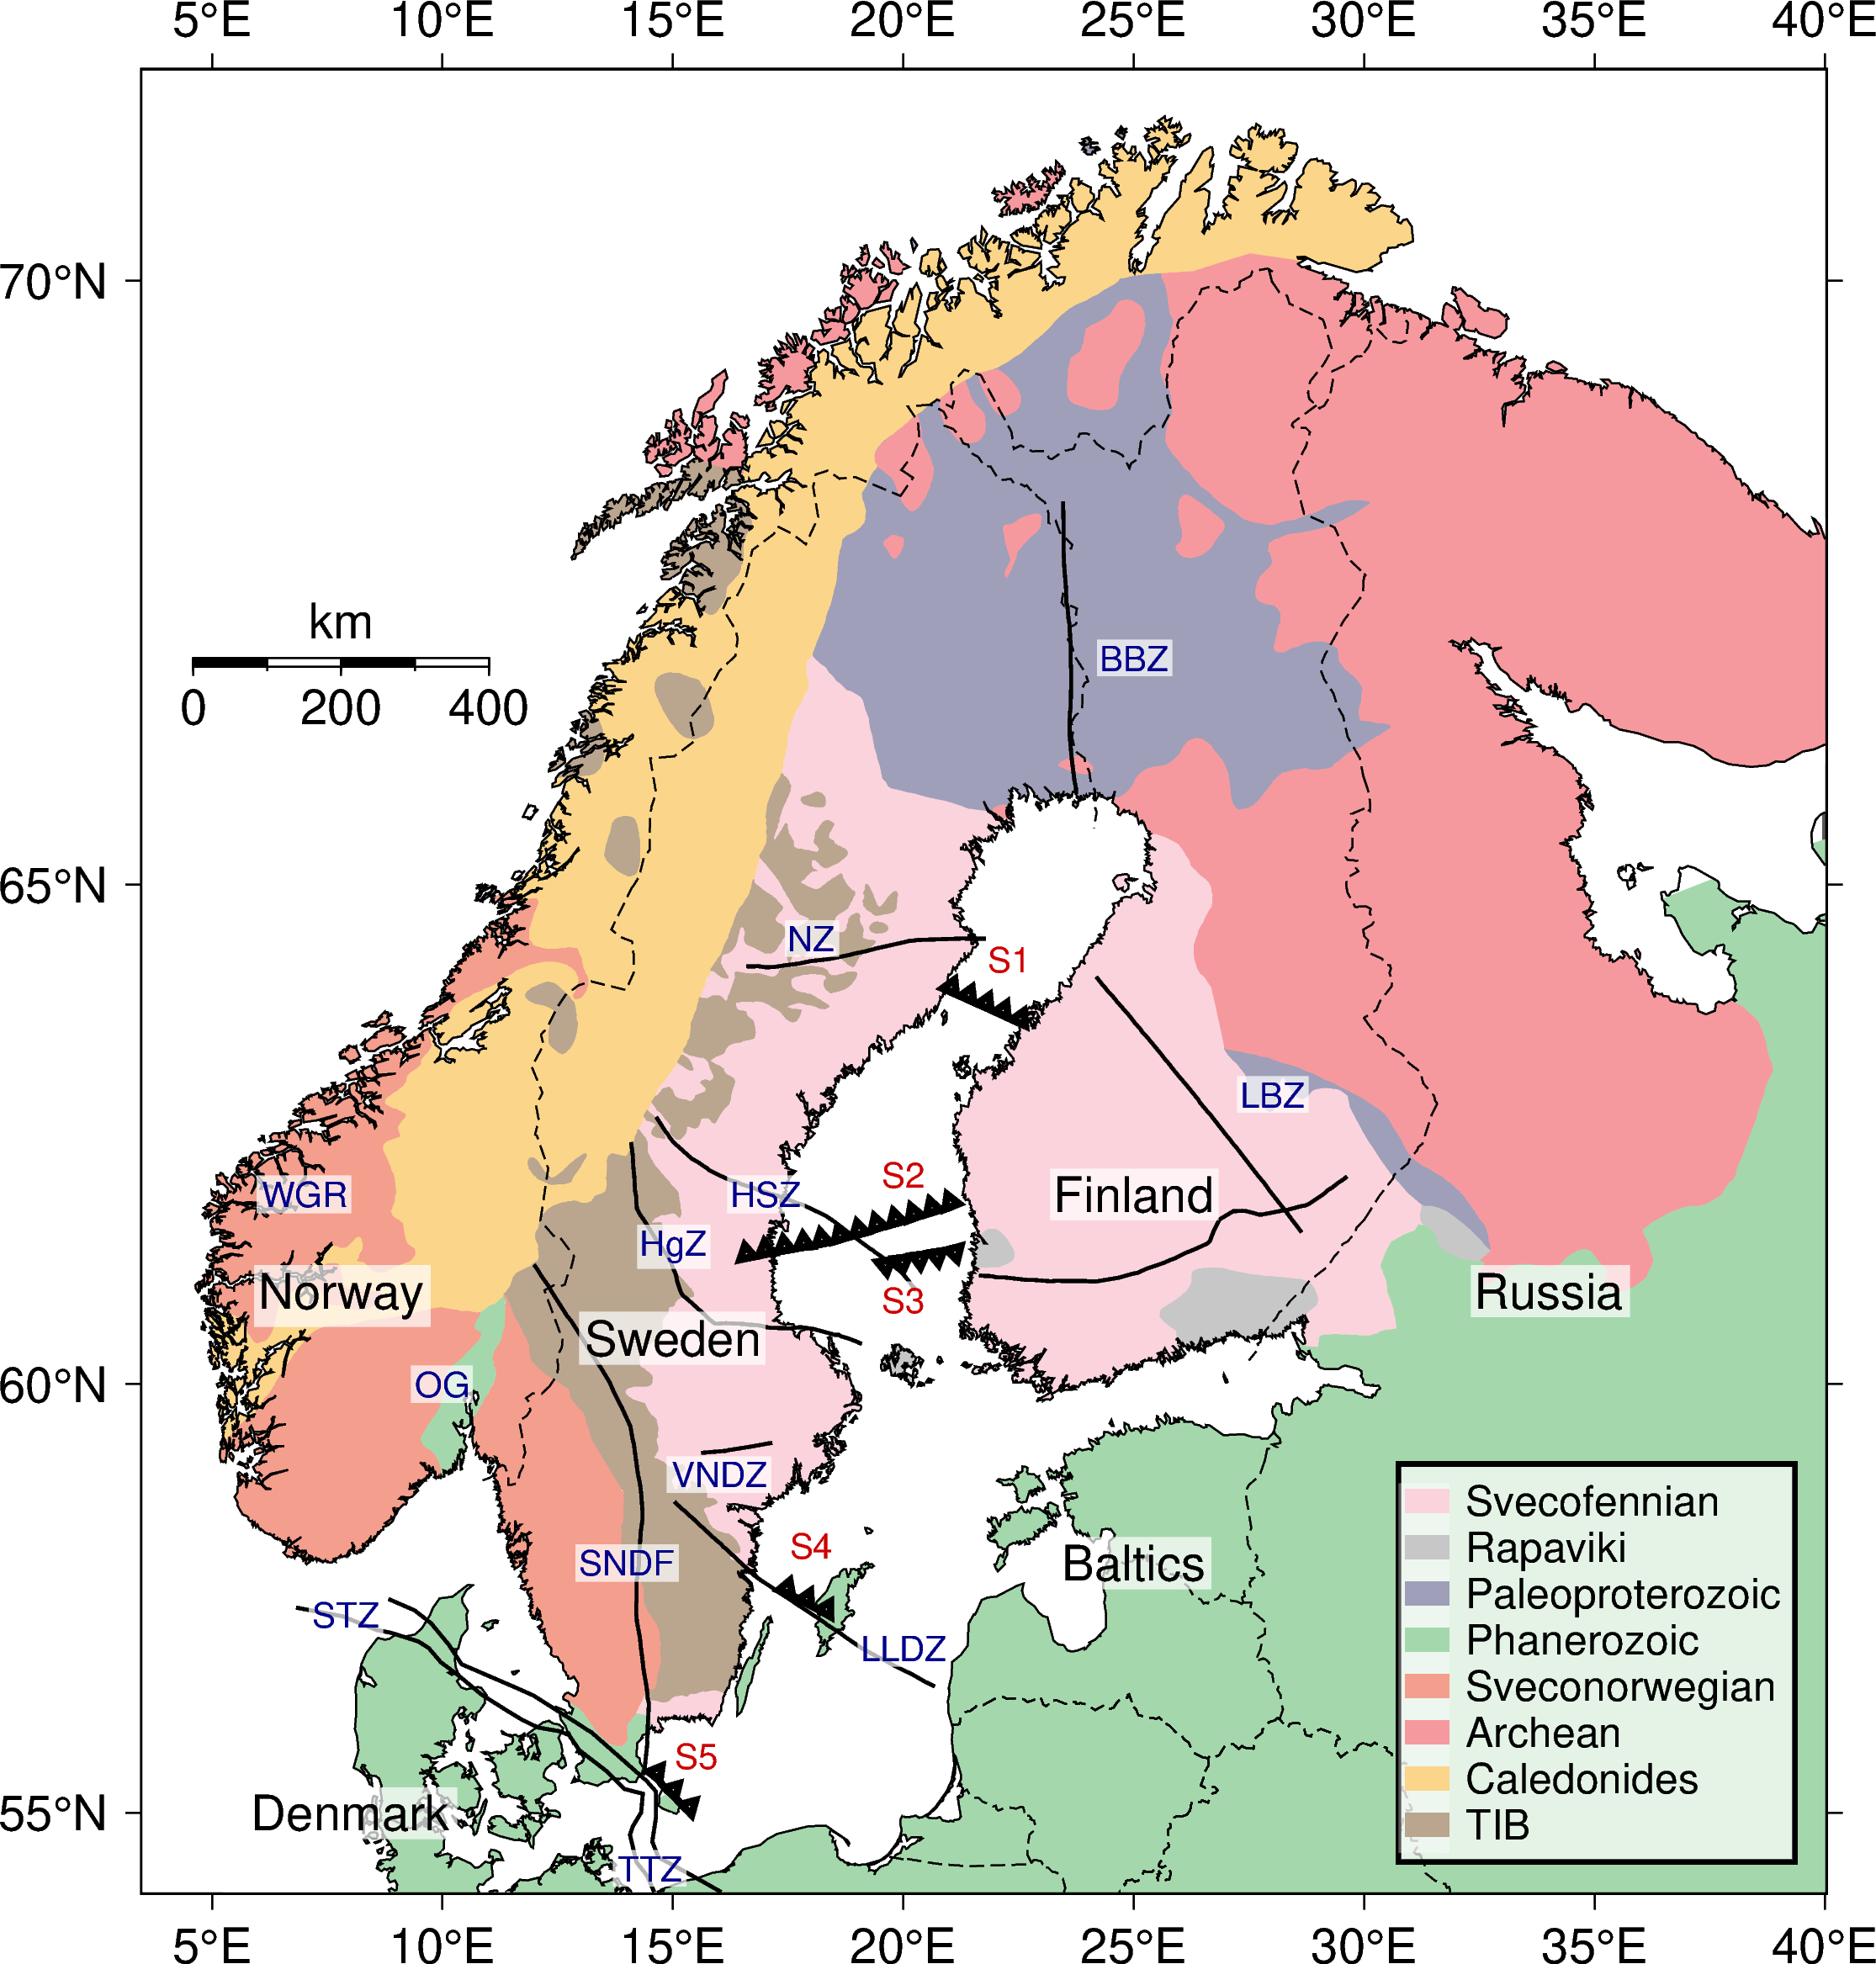

In [10]:
# coutries
textsize = '14p'
textcol = 'black'
textbcol = 'white@30'

fig.text(x = 25, y = 62, text = 'Finland', font = textsize + ',' + textcol, fill = textbcol)
fig.text(x = 15, y = 60.5, text = 'Sweden', font = textsize + ',' + textcol, fill = textbcol)
fig.text(x = 7.8, y = 61, text = 'Norway', font = textsize + ',' + textcol, fill = textbcol)
fig.text(x = 8, y = 55 , text = 'Denmark', font = textsize + ',' + textcol, fill = textbcol)
fig.text(x = 34, y = 61 , text = 'Russia', font = textsize + ',' + textcol, fill = textbcol)
fig.text(x = 25, y = 58 , text = 'Baltics', font = textsize + ',' + textcol, fill = textbcol)

# tectonic/geological features
textsize = '10p'
textcol = 'darkblue'

fig.text(x = 7.9, y = 57.4, text = 'STZ', font = textsize + ',' + textcol, fill = textbcol)
fig.text(x = 14.5 , y = 54.3 , text = 'TTZ', font = textsize + ',' + textcol, fill = textbcol)
fig.text(x = 10, y = 60, text = 'OG', font = textsize + ',' + textcol, fill = textbcol)
fig.text(x = 7, y = 62, text = 'WGR', font = textsize + ',' + textcol, fill = textbcol)
fig.text(x = 25, y = 67, text = 'BBZ', font = textsize + ',' + textcol, fill = textbcol)
fig.text(x = 28, y = 63, text = 'LBZ', font = textsize + ',' + textcol, fill = textbcol)
fig.text(x = 18, y = 64.5, text = 'NZ', font = textsize + ',' + textcol, fill = textbcol)
fig.text(x = 14, y = 58, text = 'SNDF', font = textsize + ',' + textcol, fill = textbcol)
fig.text(x = 20, y = 57, text = 'LLDZ', font = textsize + ',' + textcol, fill = textbcol)
fig.text(x = 17, y = 62, text = 'HSZ', font = textsize + ',' + textcol, fill = textbcol)
fig.text(x = 15, y = 61.5, text = 'HgZ', font = textsize + ',' + textcol, fill = textbcol)
fig.text(x = 16, y = 59, text = 'VNDZ', font = textsize + ',' + textcol, fill = textbcol)

# inferred paleo-subduction zones
textsize = '10p'
textcol = 'red3'

fig.text(x = 22.3, y = 64.3, text = 'S1', font = textsize + ',' + textcol, fill = textbcol)
fig.text(x = 20, y = 62.2, text = 'S2', font = textsize + ',' + textcol, fill = textbcol)
fig.text(x = 20, y = 60.9, text = 'S3', font = textsize + ',' + textcol, fill = textbcol)
fig.text(x = 18, y = 58.2, text = 'S4', font = textsize + ',' + textcol, fill = textbcol)
fig.text(x = 15.5, y = 55.7, text = 'S5', font = textsize + ',' + textcol, fill = textbcol)

fig.show()

Now we add a world map in the upper left corner.

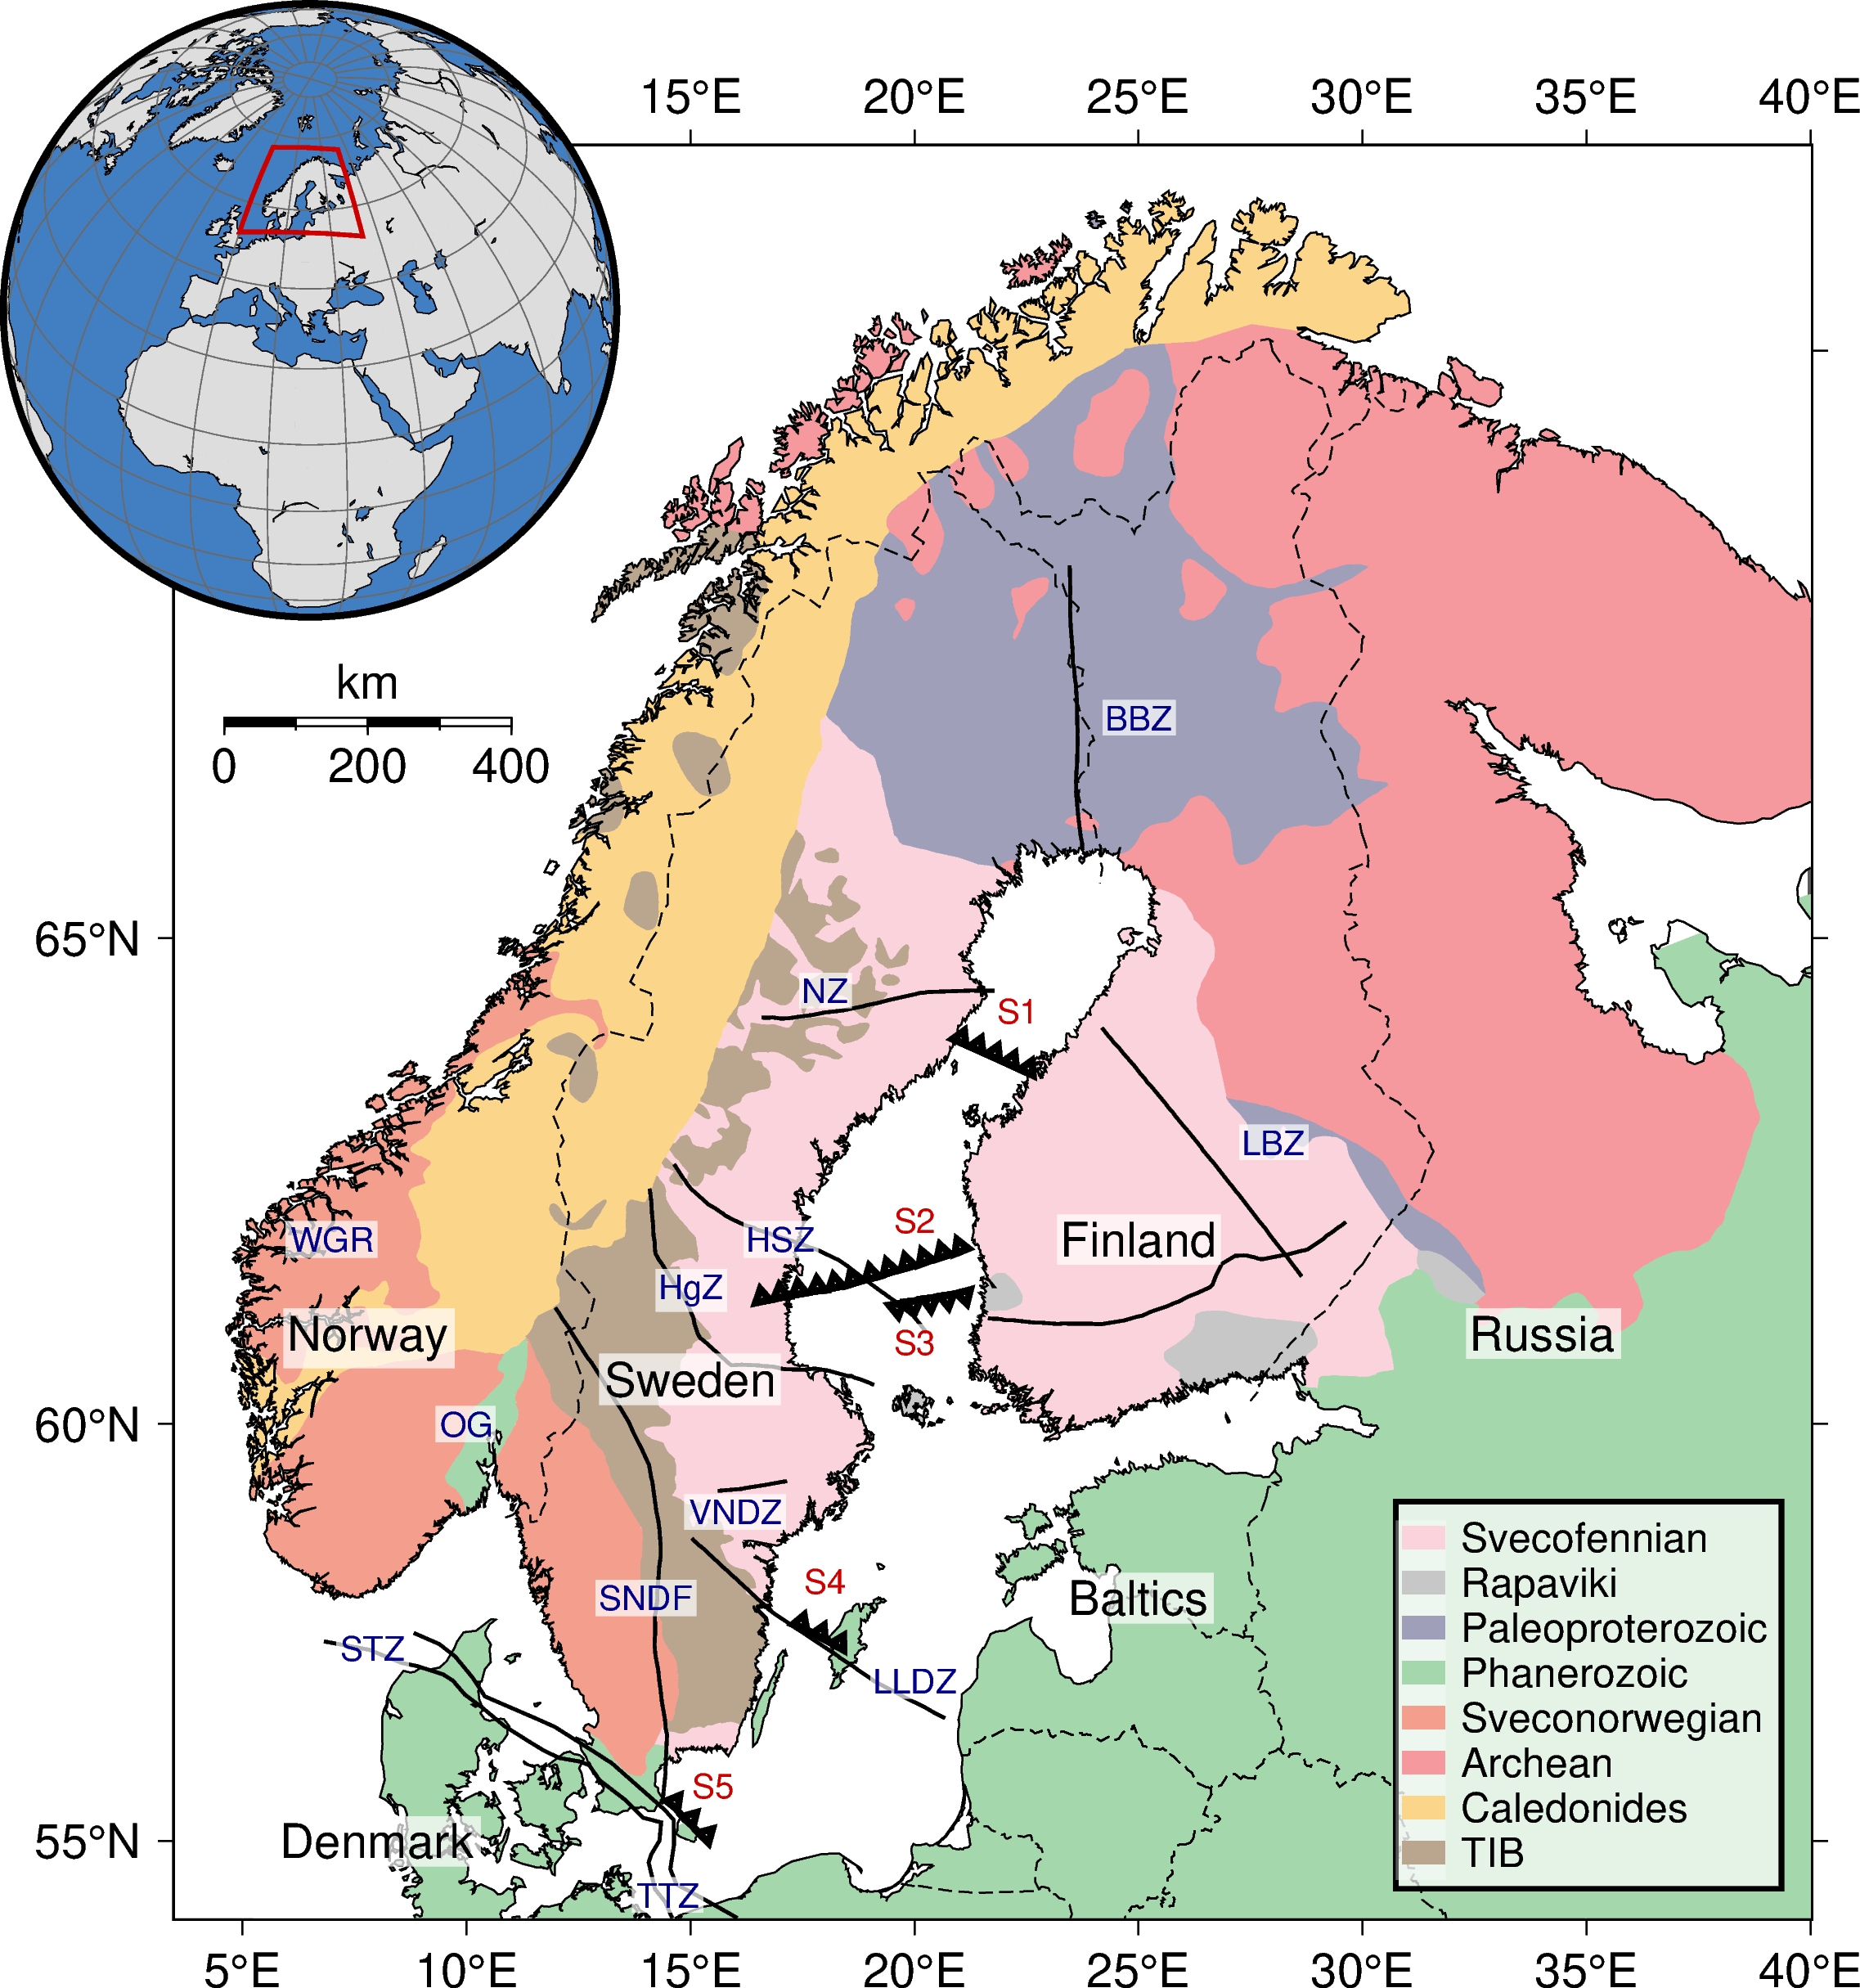

In [11]:
# shift origin for worldmap
fig.shift_origin(yshift = '5.3i', 
                 xshift = '-0.7i')

# define parameters for plotting locally
with pygmt.config(MAP_FRAME_WIDTH = '2p',
                  MAP_FRAME_PEN = '1.9p'):
    
    fig.coast(region = 'g',
              projection = 'G23/41/2.5i',
              resolution = 'c',
              frame = '15g15',
              area_thresh = '5000',
              water = '66/127/194',
              land = '221/221/221',
              shorelines = 'thinnest')
    
# mark study region as red rectangle    
data = np.array([[0, 54],
                [0, 72],
                [40, 72],
                [40, 54],
                [0, 54]])

fig.plot(data = data,
         pen = '0.045c,red3')    
       
fig.show()

Finally we add a schematic (showing the evolution of Fennoscandia in the context of plate tectonics) which was previously created with Inkscape and saved as eps file. The corresponding svg-file called `tecto_evo_schema.svg` is included in the directory where the current notebook is stored. The schematic is based on the references given at the bottom of this notebook.

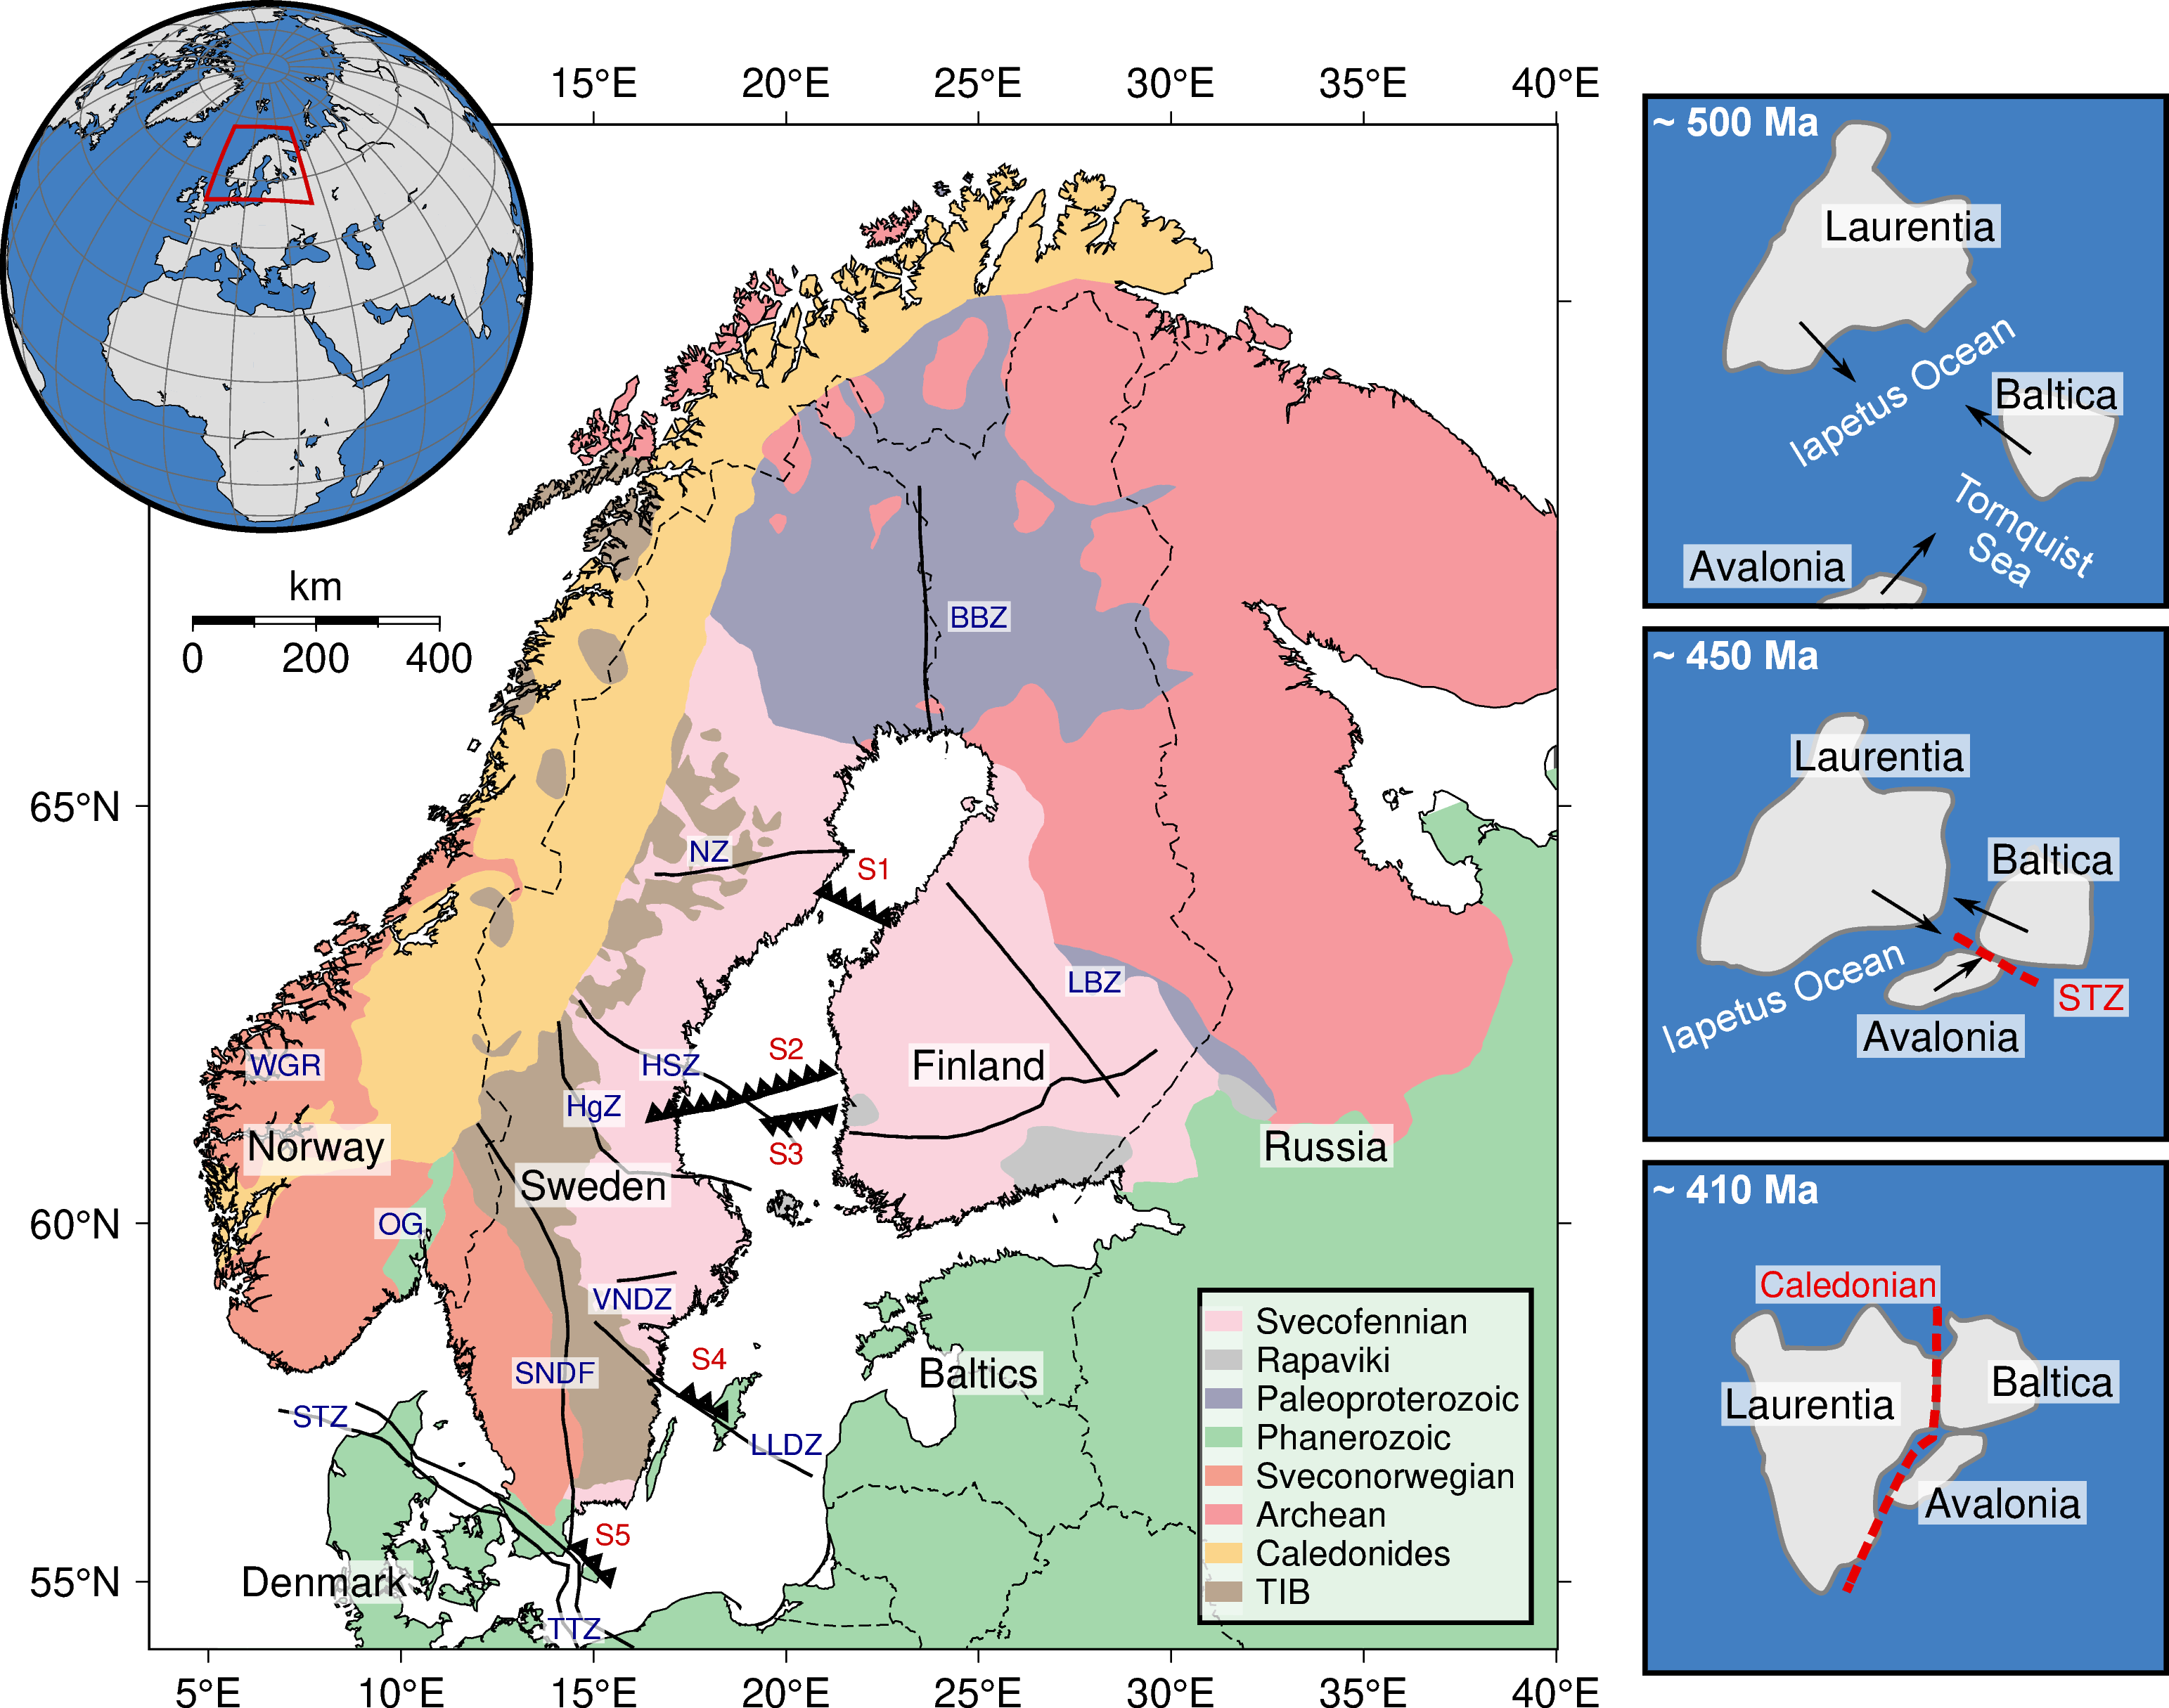

In [12]:
# shift origin for worldmap
fig.shift_origin(xshift = '8.75i', 
                 yshift = '-2i')

# add schematic from eps file
lon = 5
lat = 55

fig.image('tecto_evo_schema.eps', 
          region = [3.5, 40, 54, 71.5], 
          projection = 'm1:24000000',
          position = 'g' + str(lon) + '/' + str(lat) + '+w2.5i+jCM')

# annotations
textsize = '14p'
textcol = 'black'
textbcol = 'white@30'

fig.text(x = 8.9, y = 61.7, text = 'Baltica', font = textsize + ',' + textcol, fill = textbcol, no_clip = True)
fig.text(x = 1.4, y = 59.5, text = 'Avalonia', font = textsize + ',' + textcol, fill = textbcol, no_clip = True)
fig.text(x = 8.8, y = 55.4, text = 'Baltica', font = textsize + ',' + textcol, fill = textbcol, no_clip = True)
fig.text(x = 5.9, y = 52.7, text = 'Avalonia', font = textsize + ',' + textcol, fill = textbcol, no_clip = True)
fig.text(x = 8.8, y = 46.9, text = 'Baltica', font = textsize + ',' + textcol, fill = textbcol, no_clip = True)
fig.text(x = 7.5, y = 44.7, text = 'Avalonia', font = textsize + ',' + textcol, fill = textbcol, no_clip = True)
fig.text(x = 5.1, y = 63.7, text = 'Laurentia', font = textsize + ',' + textcol, fill = textbcol, no_clip = True)
fig.text(x = 4.3, y = 56.9, text = 'Laurentia', font = textsize + ',' + textcol, fill = textbcol, no_clip = True)
fig.text(x = 2.5, y = 46.5, text = 'Laurentia', font = textsize + ',' + textcol, fill = textbcol, no_clip = True)
fig.text(x = 9.8, y = 53.3, text = 'STZ', font = '12,232/0/0', fill = textbcol, no_clip = True)
fig.text(x = 3.5, y = 48.6, text = 'Caledonian', font = '12,232/0/0', fill = textbcol, no_clip = True)

fig.show()

Save the figure in pdf format.

In [13]:
fig.savefig('PLOT_fig1.pdf', dpi = 300)

### References

#### Tectonic/geological units and features
* **Högdahl et al. (2004)**, Geological Survey of Finland, Special Paper 37, The Transscandinavian Igneous Belt (TIB) in Sweden: a review of its character and evolution
* **Wylegalla et al. (1999)**, Tectonophysics 314, Anisotropy across the Sorgenfrei-Tornquist Zone from shear wave splitting, https://doi.org/10.1016/S0040-1951(99)00252-8
* **Korja & Heikkinen (2005)**, Precambrian Research 136, 241-268 The accretionary Svecofennian orogen-insight from the BABEL profiles, https://doi.org/10.1016/j.precamres.2004.10.007

#### Tectonic evolution

* **Mitchell (2004)**, The Geology of Northern Ireland: Our Natural Foundation, Geological Survey of Northern Ireland, Belfast, Northern Ireland

* **Lawver et al. (2011)**, Palaeogeographic and tectonic evolution of the Arctic region during the Palaeozoic, in Arctic Petroleum Geology, Geological Society of London, https://doi.org/10.1144/M35.5

* **Chew & Strachan (2014)**, The Laurentian Caledonides of Scotland and Ireland, Geological Society, London, Special Publications, 390(1), 45–91, https://doi.org/10.1144/SP390.16

* **Murphy et al. (2014)**, Highly depleted isotopic compositions evident in Iapetus and Rheic Ocean basalts: implications for crustal generation and preservation, Intern. Journ. Earth Sci., 103(5), 1219–1232, https://doi.org/10.1007/s00531-013-0925-1

* **Domeier (2016)**, A plate tectonic scenario for the Iapetus and Rheic oceans, Gondwana Research, 36, 275–295, https://doi.org/10.1016/j.gr.2015.08.003

